* I will import the following libraries once again for the project:

In [364]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from IPython.display import Image
# from IPython.core.display import HTML 

DO = '#7D1B7E' #for color

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

## Data Import
* We can see that this dataset loaded in correctly. The data consists of 10 columns with 1,547 rows. Exactly what I had towards the end of the first worksheet '01_Data_Cleaning'

In [365]:
df = pd.read_csv('./data/fleet_clean.csv')
print(df.shape)
df.head()

(1547, 10)


parent_airline          airline aircraft_type  current  historic  total  \
0  Aegean Airlines  Aegean Airlines   Airbus A319      1.0       3.0    4.0   
1  Aegean Airlines      Olympic Air   Airbus A319      0.0       8.0    8.0   
2  Aegean Airlines  Aegean Airlines   Airbus A320     38.0       3.0   41.0   
3  Aegean Airlines      Olympic Air   Airbus A320      0.0       9.0    9.0   
4  Aegean Airlines  Aegean Airlines   Airbus A321      8.0       0.0    8.0   

   orders unit_cost current_total_cost  average_age  
0     0.0       $90                $90         11.6  
1     0.0       $90                 $0          NaN  
2     0.0       $98             $3,724          7.5  
3     0.0       $98                 $0          NaN  
4     0.0      $115               $919         10.3

## Exploratory Data Analysis

* I will make sure the data types of the features are in correct format. 
* According to the function below, 5 of the features (current, historic, orders, unit_cost, and current_total_cost) are listed as object types (categorical) when they should be numerical types. As a result, I will change the data types accordingly. 

In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 10 columns):
parent_airline        1547 non-null object
airline               1547 non-null object
aircraft_type         1547 non-null object
current               1547 non-null float64
historic              1547 non-null float64
total                 1547 non-null float64
orders                1547 non-null float64
unit_cost             1547 non-null object
current_total_cost    1547 non-null object
average_age           809 non-null float64
dtypes: float64(5), object(5)
memory usage: 120.9+ KB


In [369]:
df['current'] = df['current'].astype('float')
df['historic'] = df['historic'].astype('float')
df['orders'] = df['orders'].astype('float')

df.unit_cost = [rows.replace('$', '') for rows in df.unit_cost]
df.current_total_cost = [rows.replace('$', '').replace(',','') for rows in df.current_total_cost]
df['unit_cost']= df.unit_cost.astype('float')
df['current_total_cost']= df.current_total_cost.astype('float')

In [370]:
df.head()

parent_airline          airline aircraft_type  current  historic  total  \
0  Aegean Airlines  Aegean Airlines   Airbus A319      1.0       3.0    4.0   
1  Aegean Airlines      Olympic Air   Airbus A319      0.0       8.0    8.0   
2  Aegean Airlines  Aegean Airlines   Airbus A320     38.0       3.0   41.0   
3  Aegean Airlines      Olympic Air   Airbus A320      0.0       9.0    9.0   
4  Aegean Airlines  Aegean Airlines   Airbus A321      8.0       0.0    8.0   

   orders  unit_cost  current_total_cost  average_age  
0     0.0       90.0                90.0         11.6  
1     0.0       90.0                 0.0          NaN  
2     0.0       98.0              3724.0          7.5  
3     0.0       98.0                 0.0          NaN  
4     0.0      115.0               919.0         10.3

In [371]:
df.describe().T

count         mean          std  min   25%    50%  \
current             1547.0    13.296703    32.876251  0.0   0.0    2.0   
historic            1547.0    10.347770    21.182245  0.0   0.0    3.0   
total               1547.0    24.072398    46.283185  0.0   4.0   11.0   
orders              1547.0     5.936652    23.178867  0.0   0.0    0.0   
unit_cost           1547.0   117.855850    97.354731  2.0  45.0   75.0   
current_total_cost  1547.0  1505.606335  3501.935701  0.0   0.0  148.0   
average_age          809.0    10.070334     6.845251  0.1   5.0    8.9   

                       75%      max  
current               14.0    718.0  
historic              11.0    325.0  
total                 26.0    952.0  
orders                 0.0    400.0  
unit_cost            187.0    433.0  
current_total_cost  1579.5  53118.0  
average_age           14.4     39.0

--------
### Number of unique Parent Airlines, Airlines, and Aircraft Types: 

In [372]:
print(f'Unique number of Parent Airlines: {df.parent_airline.nunique()}')
print(f'Unique number of Airlines: {df.airline.nunique()}')
print(f'Unique number of Aircraft Types: {df.aircraft_type.nunique()}')

Unique number of Parent Airlines: 113
Unique number of Airlines: 276
Unique number of Aircraft Types: 93


### Parent Airlines: 
* There are 113 unique Parent Airlines in this data. I will now group the same Parent Airlines to determine the fleet size of each Parent Airlines. 

In [373]:
list_of_cols_1= df.drop(['parent_airline', 'airline', 'aircraft_type', 'unit_cost', 'current_total_cost', 'average_age'], axis=1)
list_of_cols_2= df.drop(['parent_airline', 'airline', 'aircraft_type', 'current', 'historic', 'total','orders','average_age'], axis=1)

**Top 10 Parent Airlines (by total # of Current, Historic, Total, and Ordered Airplanes)**

* According to the plots shown below, American Airline, Delta Airline, Lufthansa, and United Airline are among the parent airlines that have the most 'total' airplanes in their arsenal. This includes current airplanes in operation as well as historic airplanes from the past. 
* However, the parent airlines that have the most amount of airplanes ordered are AirAsia, Lion Air, IndiGo, American Airlines and Southwest Airlines. This will also hold true as the most popular airlines further down below. 

In [374]:
def subplot_bar(dataframe, list_of_columns, figsize_height = 56):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(figsize=(38,figsize_height),nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].bar(dataframe.groupby('parent_airline').sum()[column].sort_values(ascending=False).head(10).index, 
                       dataframe.groupby('parent_airline').sum()[column].sort_values(ascending=False).head(10).values, color= DO)
                 
        ax[i].set_title(f'Top 10 Parent Airlines by # {list_of_columns[i]} airplanes', fontsize = 30)
        ax[i].set_ylabel('No. of Airplanes', fontsize = 24)
        ax[i].tick_params(axis='x',labelsize=24, rotation=65)
        ax[i].tick_params(axis='y',labelsize=24)

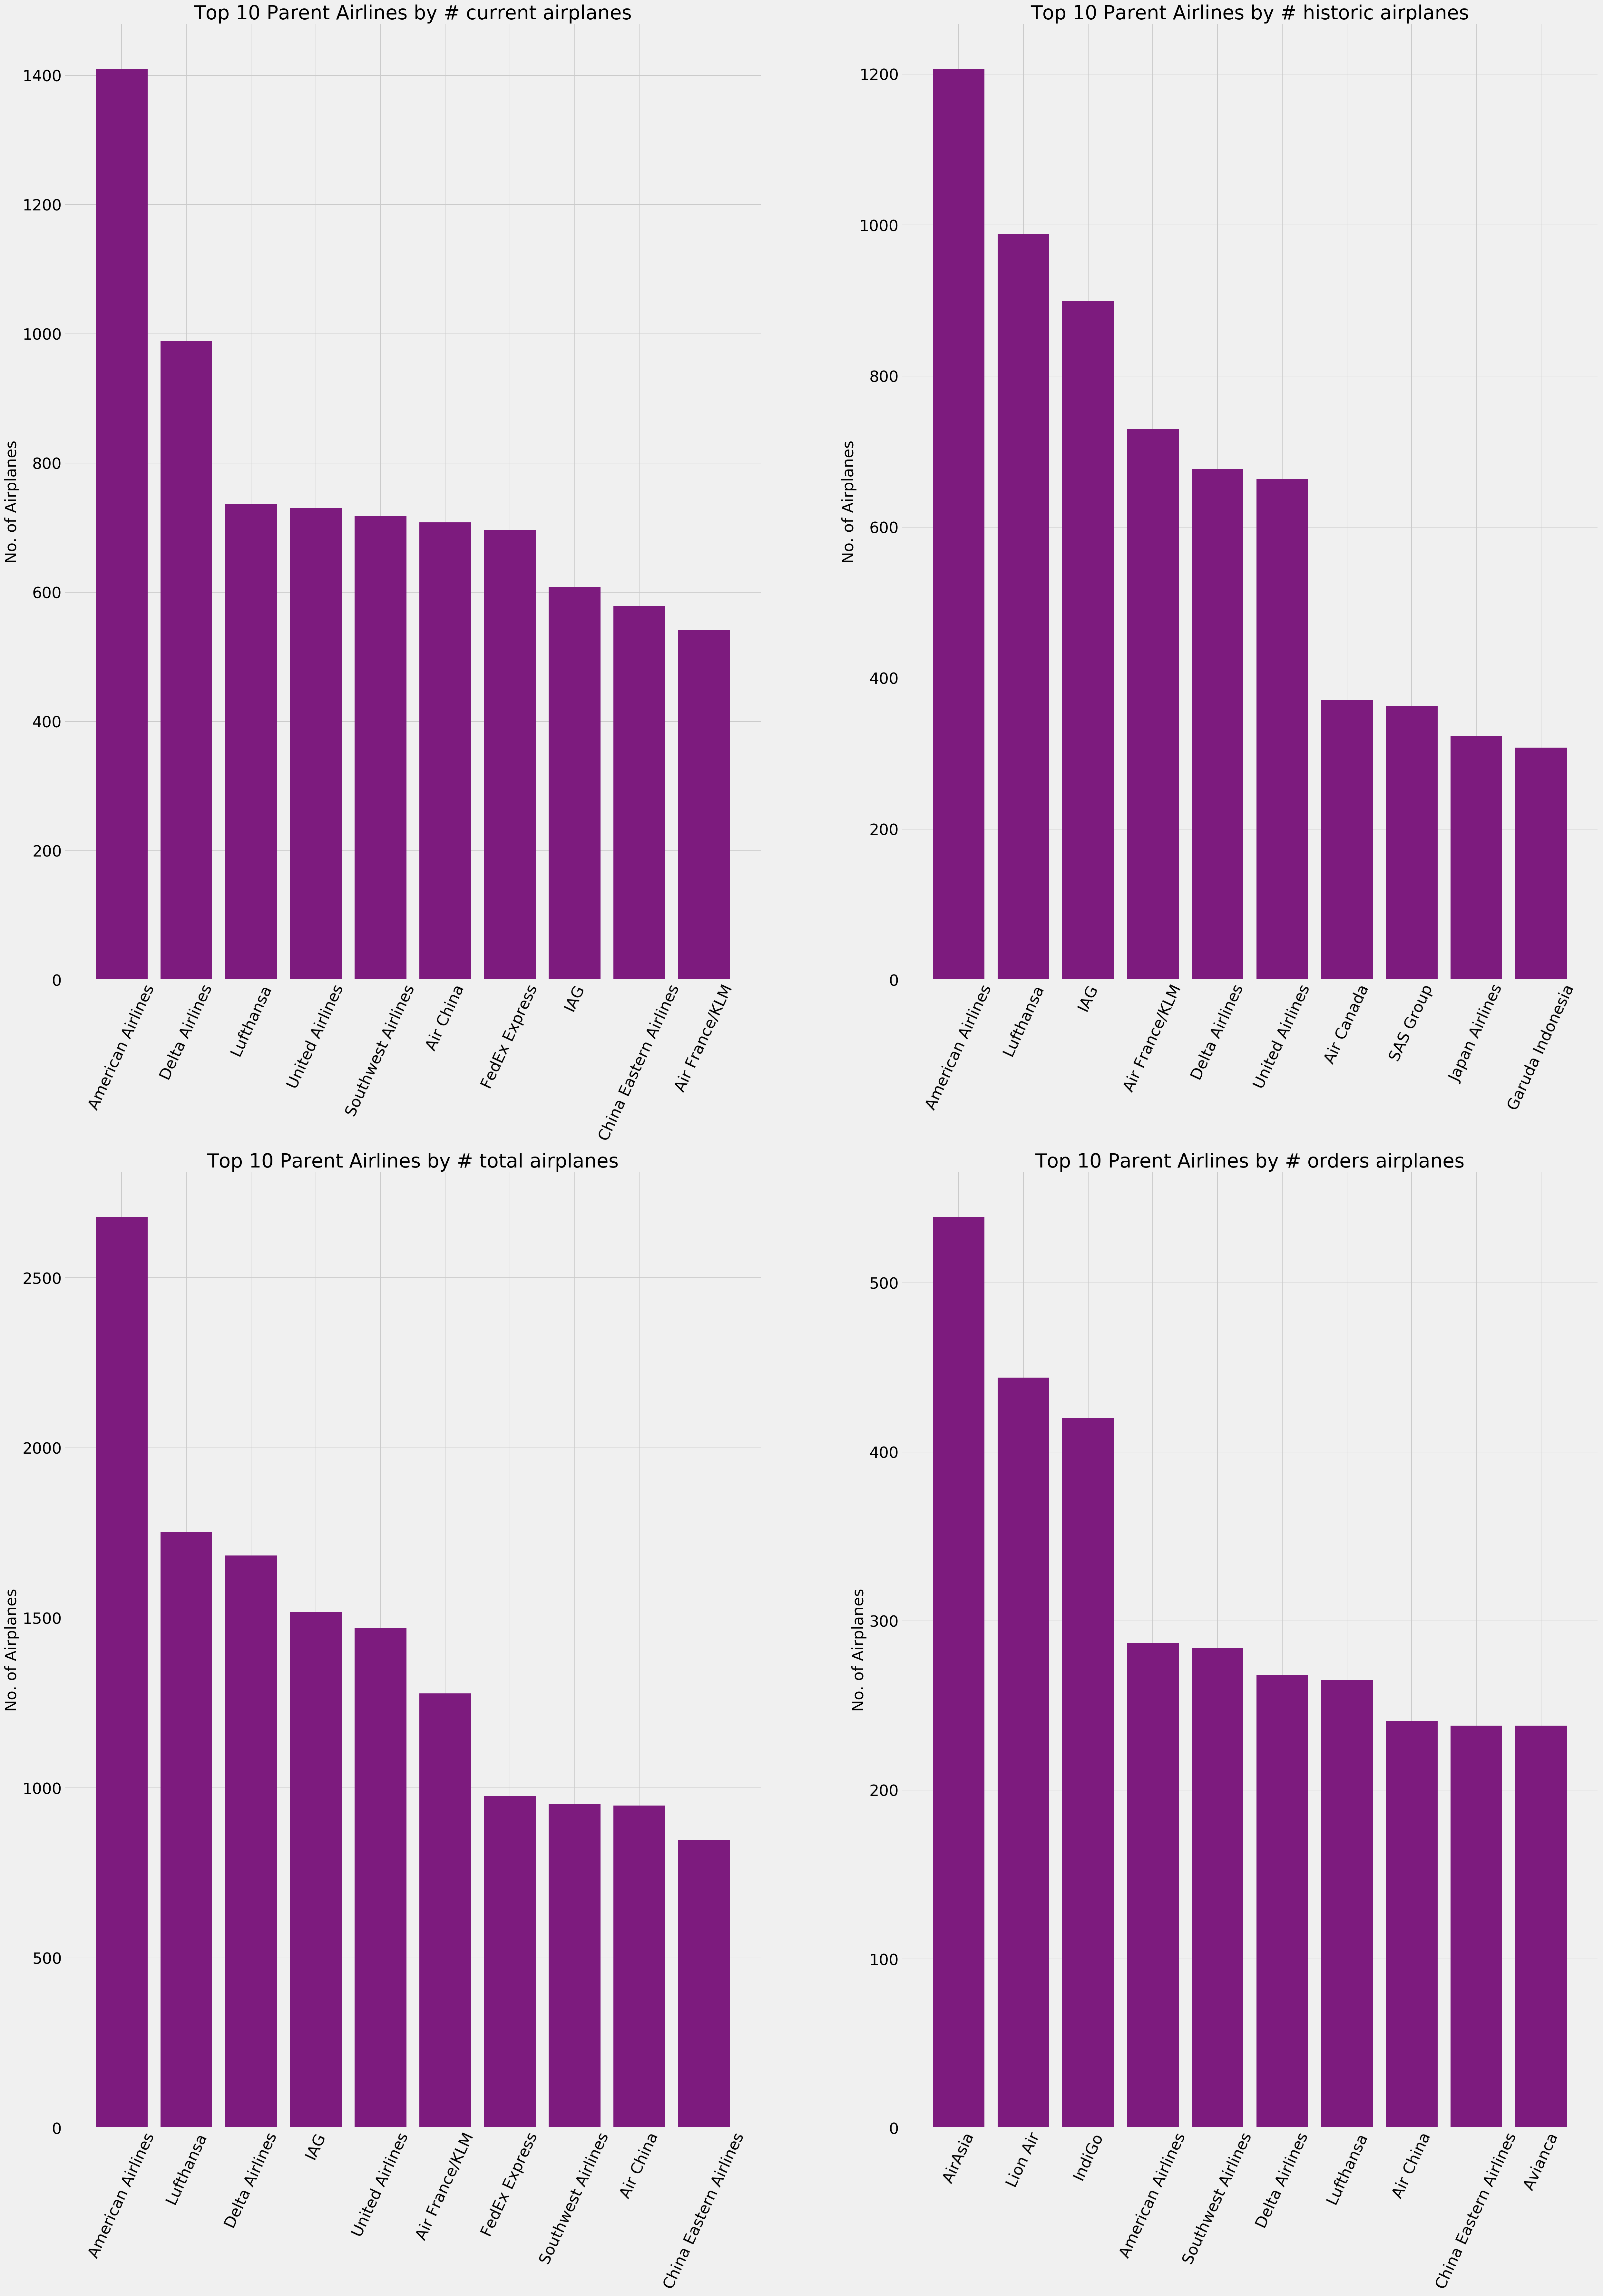

In [375]:
subplot_bar(df,list_of_cols_1.columns)

### Airlines: 

#### **Biggest Growing Airlines**
* These are the airlines that have the most orders.

In [333]:
df.groupby('airline').sum()['orders'].sort_values(ascending=False).head(10)


airline
Lion Air                  425.0
IndiGo                    420.0
AirAsia                   401.0
American Airlines         287.0
Southwest Airlines        284.0
Delta Airlines            268.0
China Eastern Airlines    233.0
Emirates                  231.0
Skywest                   225.0
RyanAir                   205.0
Name: orders, dtype: float64

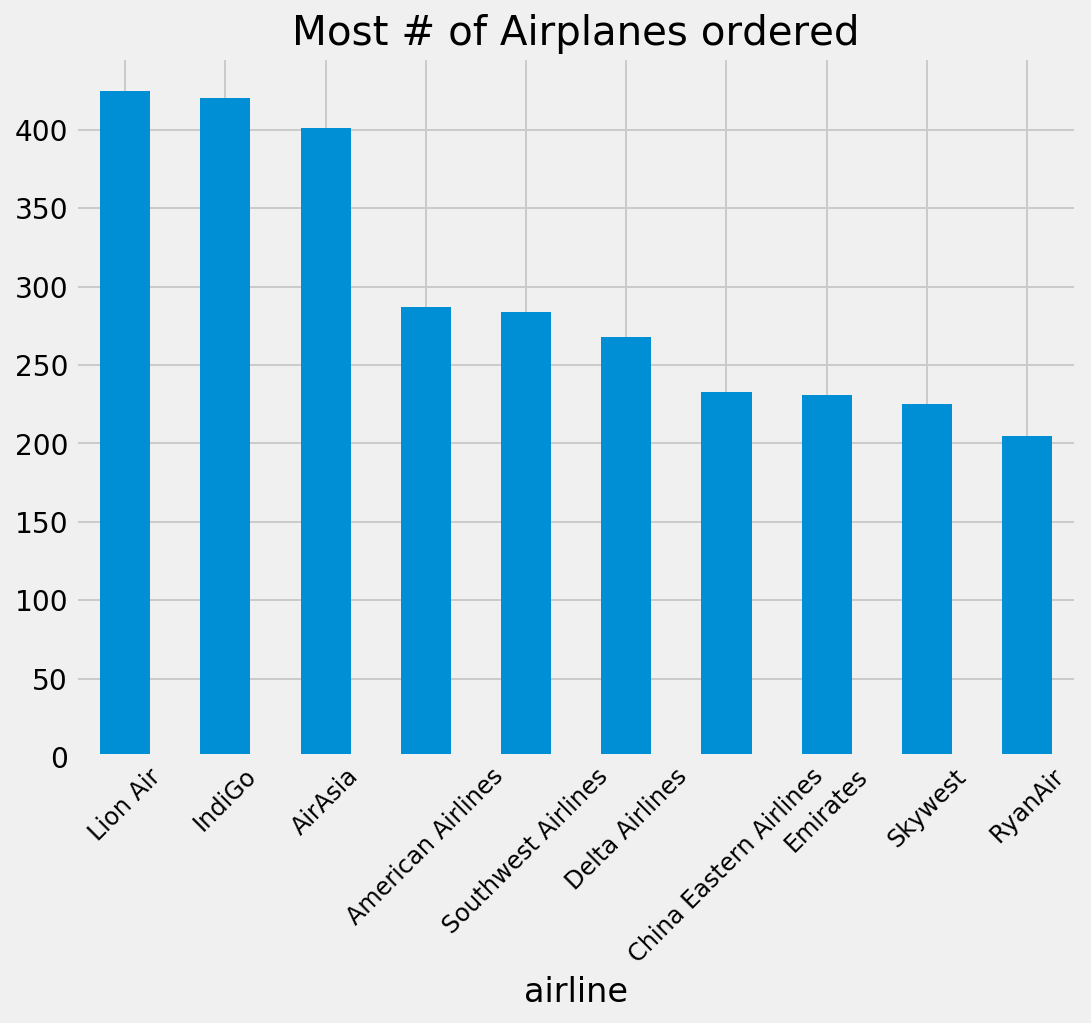

In [334]:
df.groupby('airline').sum()['orders'].sort_values(ascending=False).head(10).plot('bar', figsize=(8,6))
plt.title('Most # of Airplanes ordered')
plt.tick_params(axis='x',labelsize=12, rotation=45)


Lion Air, IndiGoi, Air Asia, American Airlines, and Southwest Airlines are among the top 5 airlines with the highest orders rate. 
From the look of the plot below, **it seems that these specific airline (aircraft types) are rapidly expanding, especially Lion Air, IndiGo, and AirAsia.**

* In the case of Lion Air, only 2 specific aircrafts received an order of +200 airplanes - Airbus A320 and Boeing 737.
* For IndiGo, Airbus A320 aircraft received an order of 400 airplanes.
* For Air Asia, many of the airlines that placed an order for airplanes had no or very few current or past airplanes. 
* For American Airlines, since this is a well-known airline. They already have many airlines currently in operation. They are also ordering more, but not to the signficant rate as the other airlines.
* For Southwest Airlines, much like American Airlines, this is a very well-known and huge airline. As a result, they have many current airplanes already in operation as well as in the past. Their big order for new planes makes sense given their current inventory and immense business operation. 



**Lion Air, IndiGo and AirAsia are the 3 airlines with rapid rate of growth (low number of airplanes in operation currently; high number of new airplanes ordered**

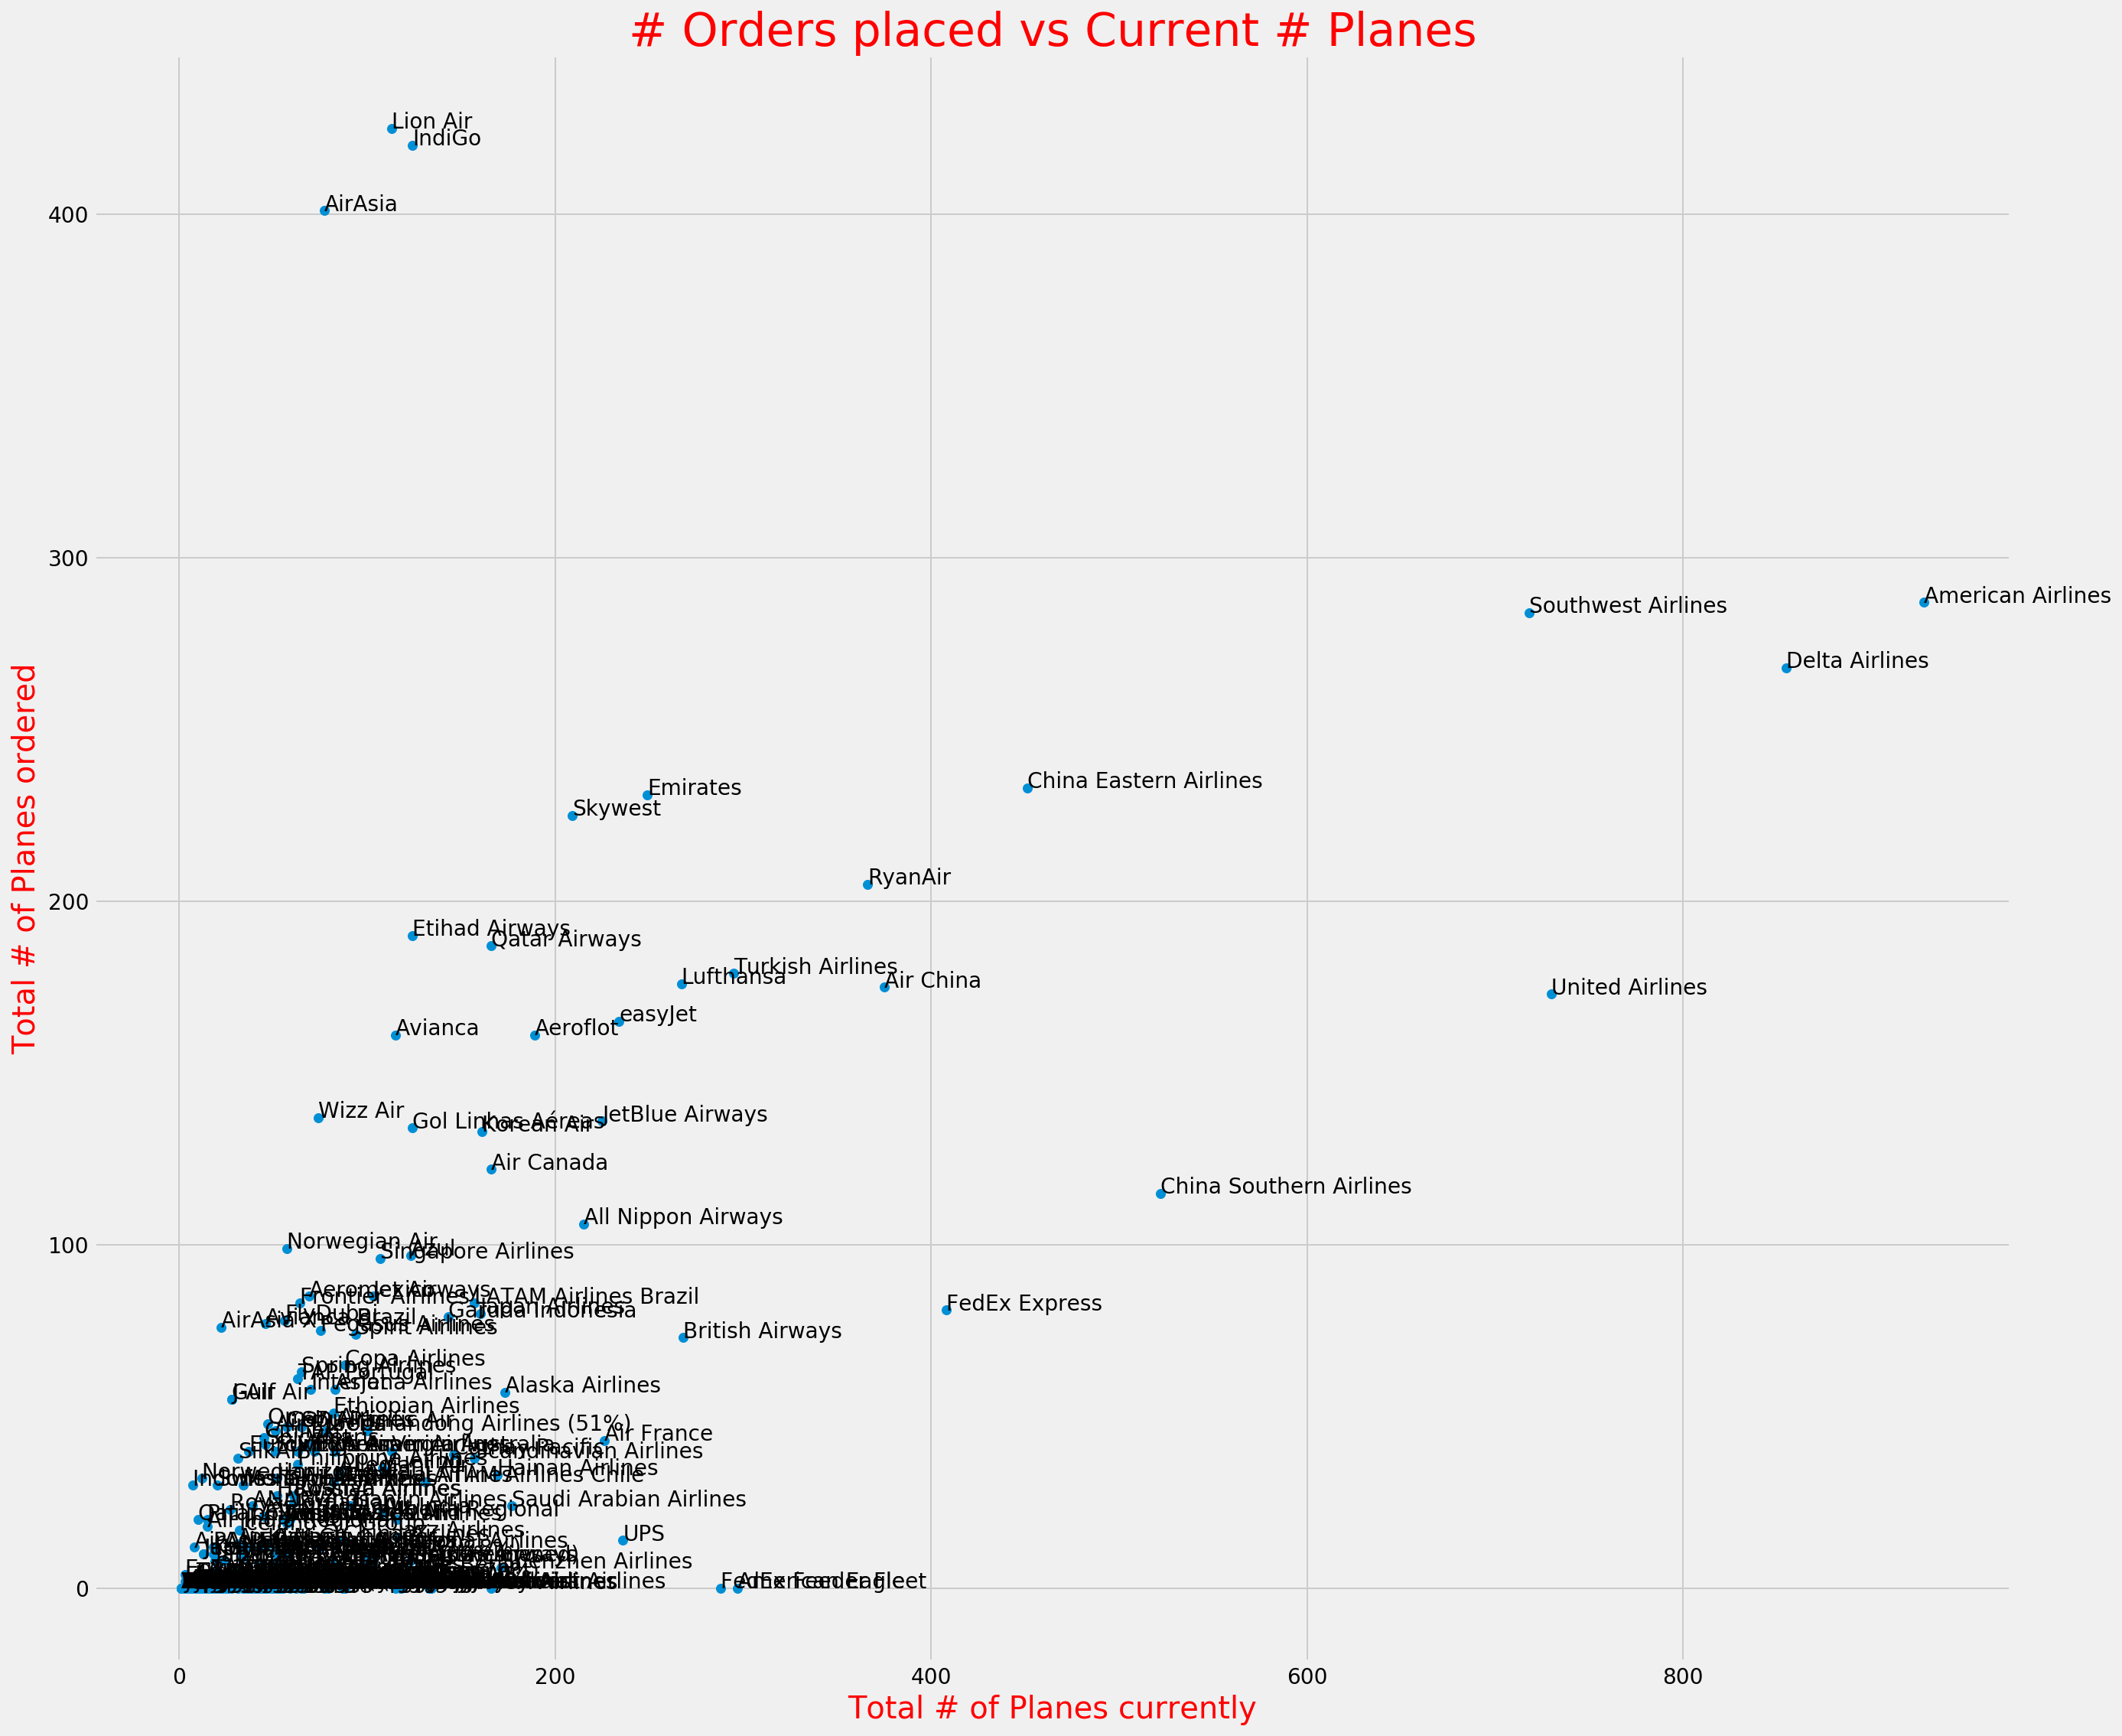

In [335]:
y = df.groupby('airline').sum()['orders'].values
x = df.groupby('airline').sum()['current'].values
n = df.groupby('airline').mean()['orders']

fig, ax = plt.subplots(figsize=(20,18))
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(n.index[i], (x[i], y[i]))
    
plt.title('# Orders placed vs Current # Planes', fontsize=30, color='r')
plt.ylabel('Total # of Planes ordered', fontsize=20, color='r')
plt.xlabel('Total # of Planes currently', fontsize=20, color='r');

----

### Aircraft Types:

#### **Total Number of AirCraft Type Ordered vs Total Number of AirCraft Type currently in Operation:**

From the plot shown below, Boeing 737, Airbus A320, Airbus A321, and Boeing 777 are the AirCraft Types that are the most popular. They are the most common types of aircrafts currently in operation as well as the most ordered.

**However, Airbus A350 XWB, Mitsubishi MRJ90, Airbus A350, and Boeing 787 are the fastest growing "new" aircrafts. All of these aircraft types are among the most requested aircrafts, while also being the least common aircraft types operated currently by airlines.**

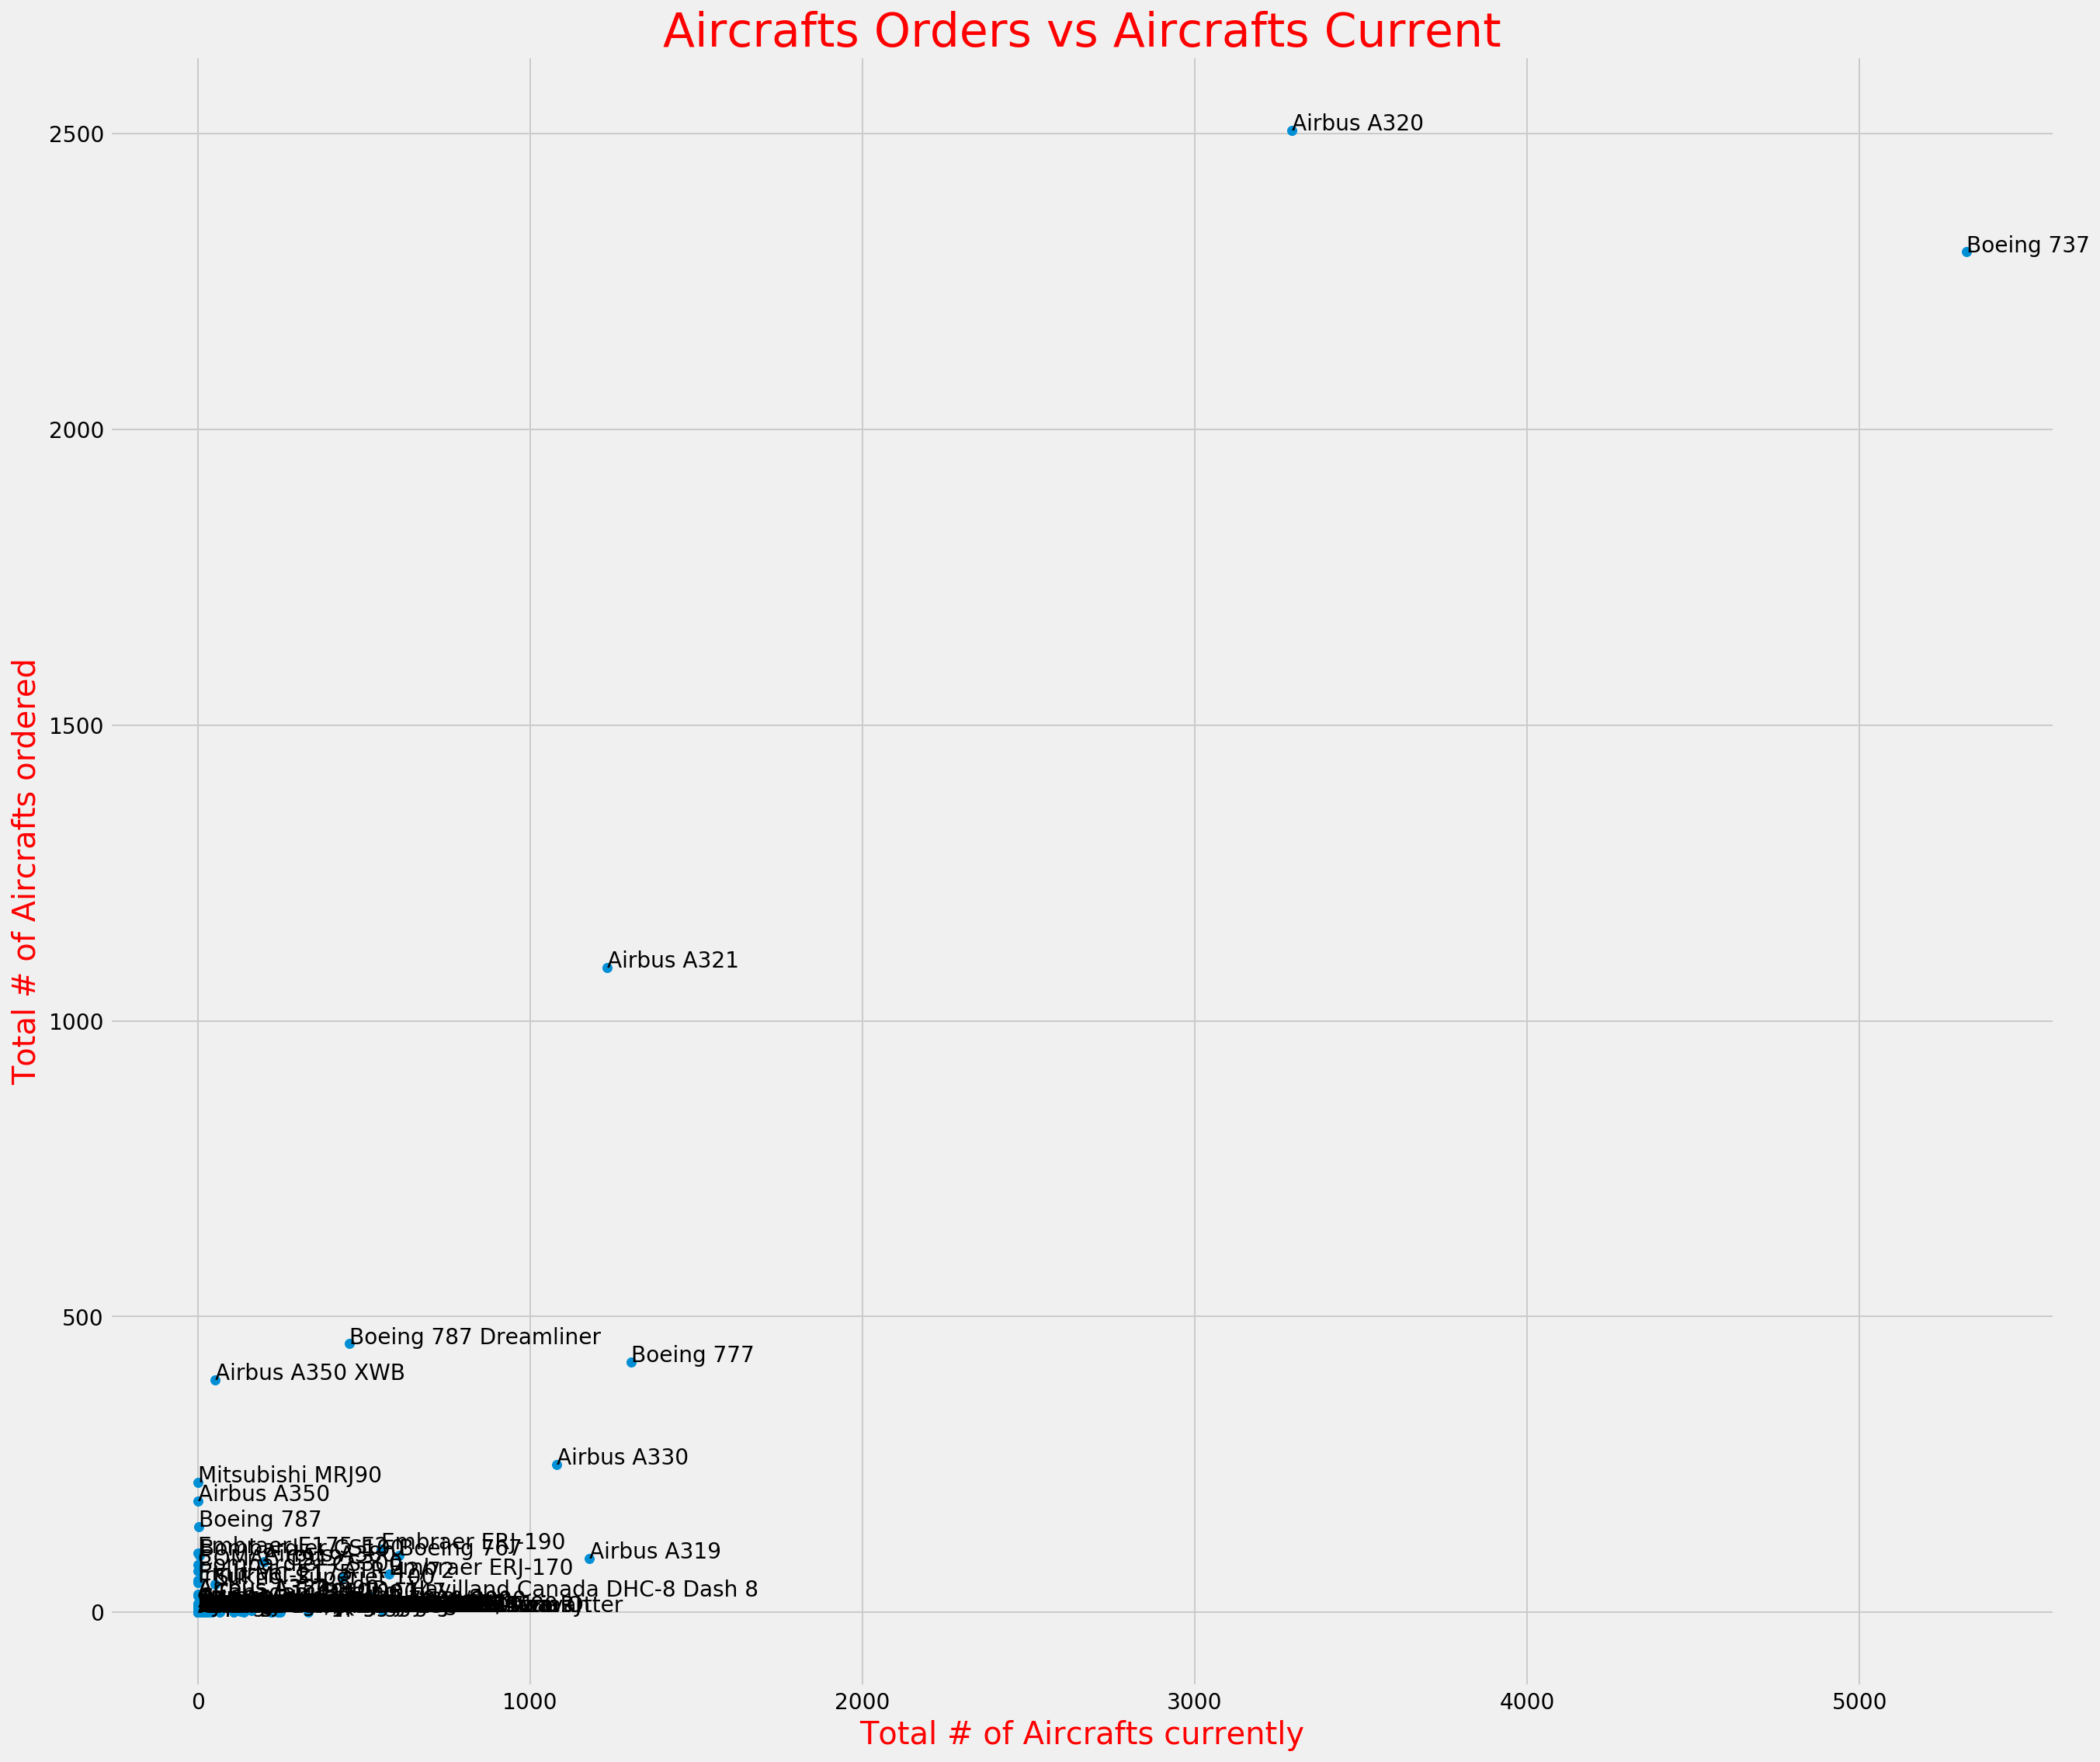

In [336]:
y = df.groupby('aircraft_type').sum()['orders'].values
x = df.groupby('aircraft_type').sum()['current'].values
n = df.groupby('aircraft_type').mean()['orders']

fig, ax = plt.subplots(figsize=(20,18))
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(n.index[i], (x[i], y[i]))
    
plt.title('Aircrafts Orders vs Aircrafts Current', fontsize=30, color='r')
plt.ylabel('Total # of Aircrafts ordered', fontsize=20, color='r')
plt.xlabel('Total # of Aircrafts currently', fontsize=20, color='r');

#### **Avg Age of Aircraft Types vs Total Number of AirCraft Type currently in Operation:**

* The average age of the current aircraft types is around 10 years old. 
* From the plot below, it turns out that most of the really old aircrafts as well as the really new aircrafts (with the exception of a few) tend to have low to no Aircrafts currently in operation. 

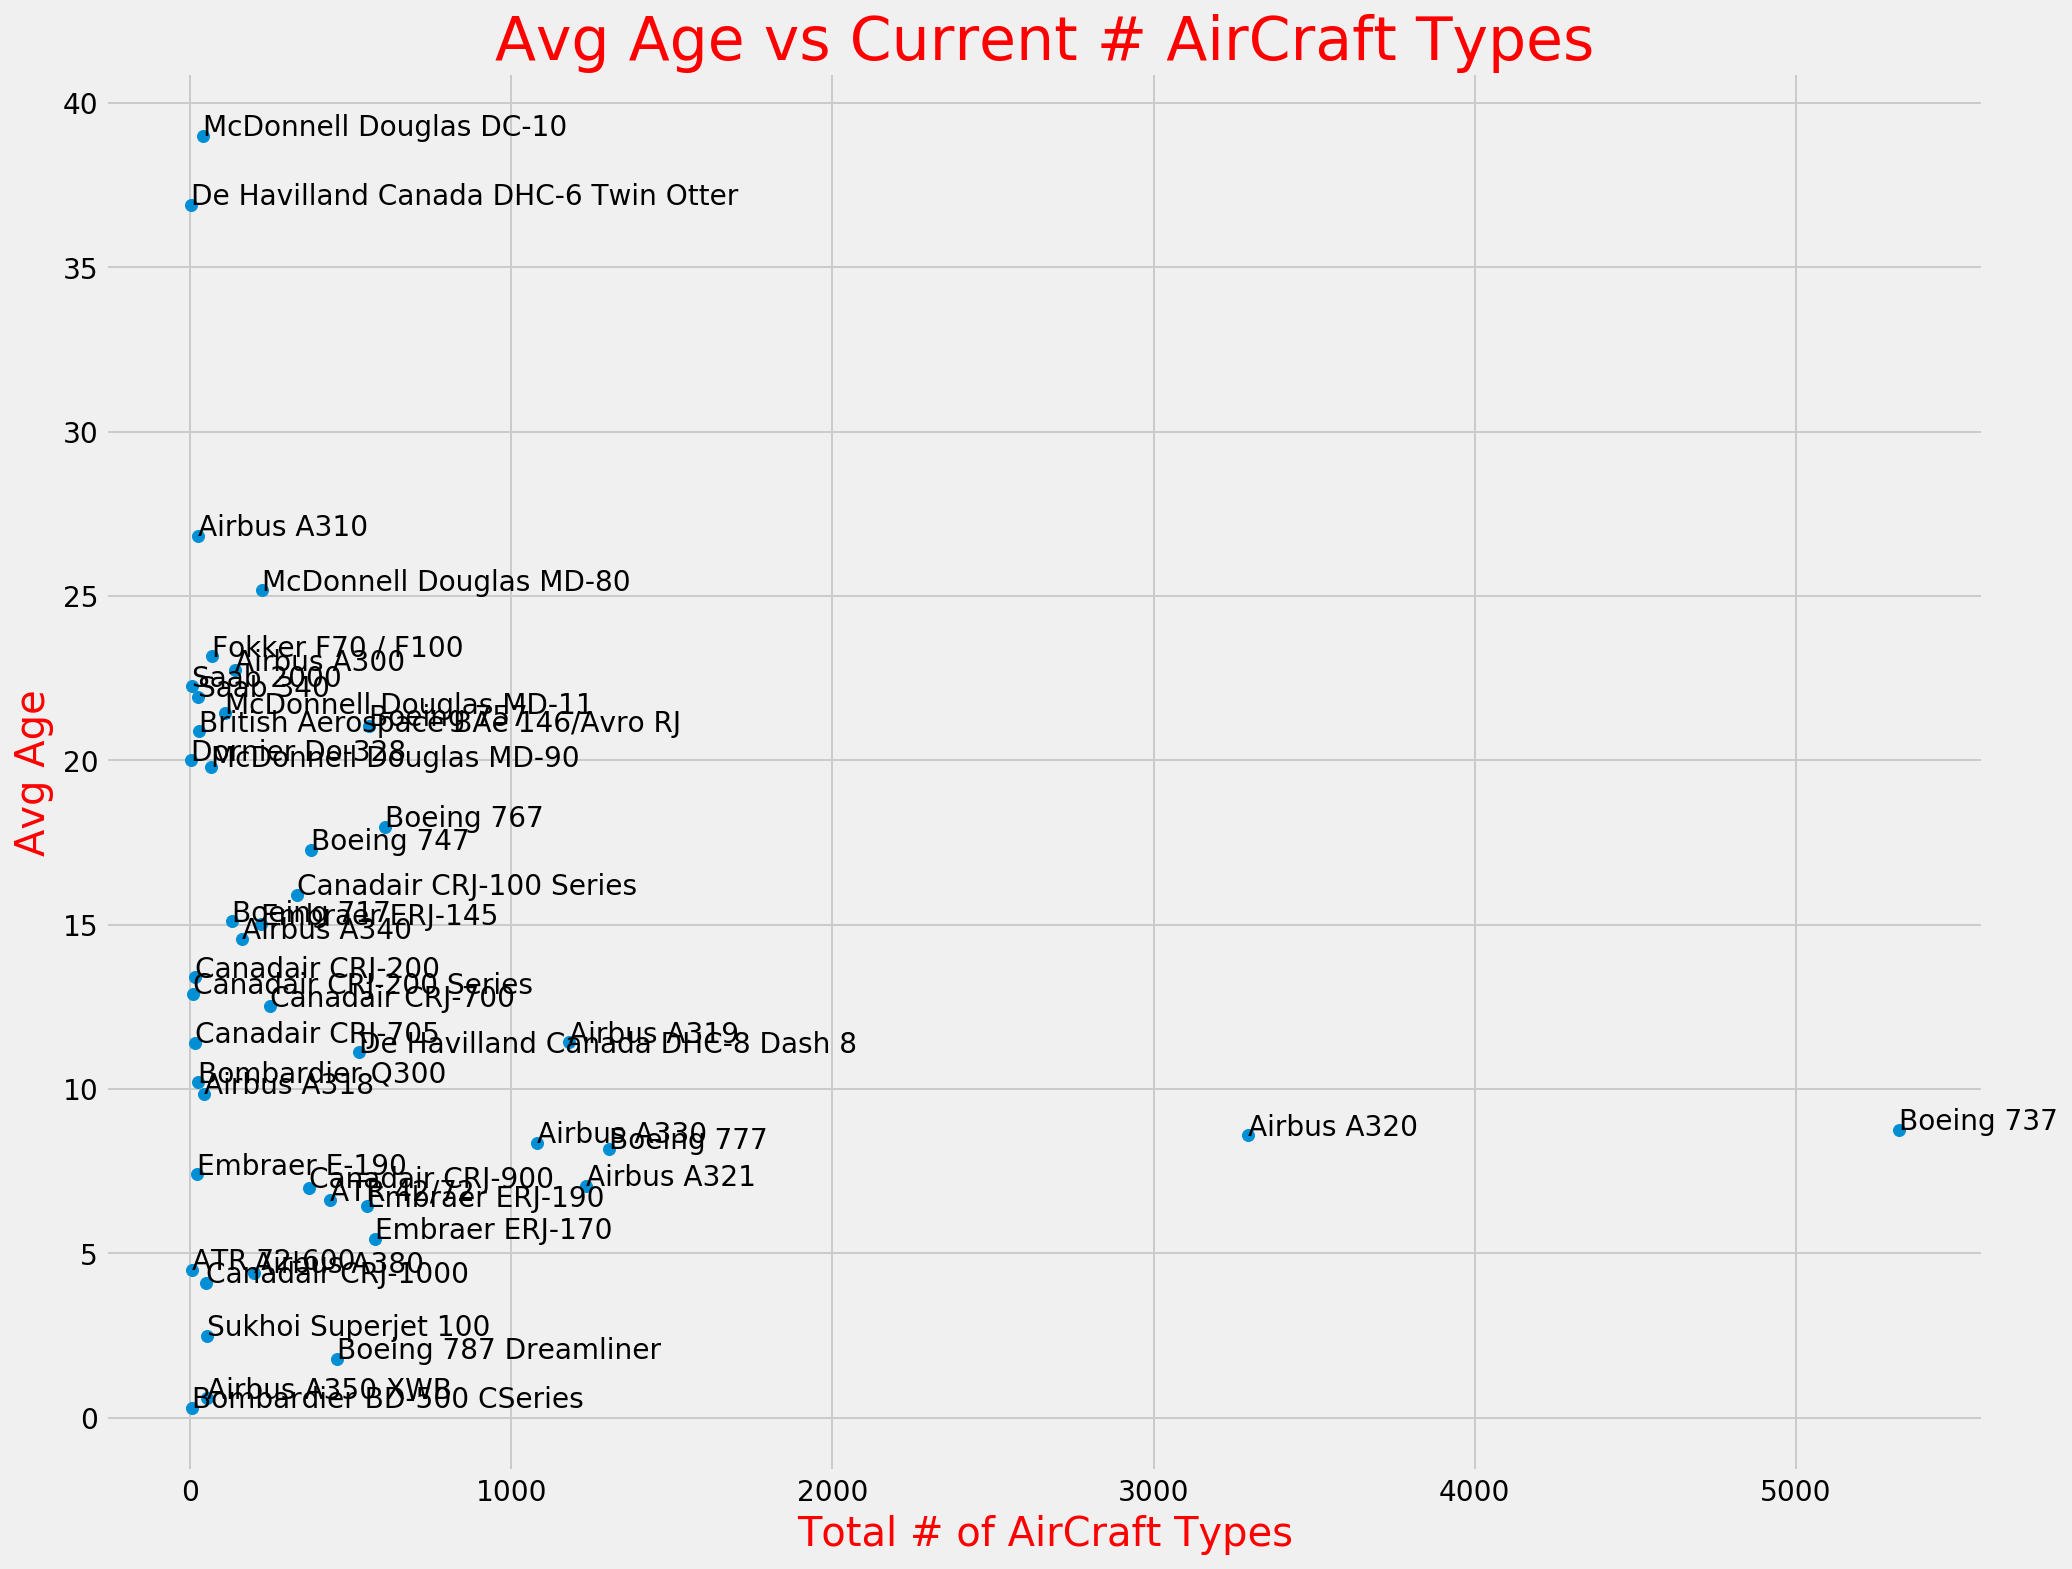

In [348]:
y = df.groupby('aircraft_type').mean()['average_age'].values
x = df.groupby('aircraft_type').sum()['current'].values
n = df.groupby('aircraft_type').mean()['average_age']

fig, ax = plt.subplots(figsize=(15,12))
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(n.index[i], (x[i], y[i]))
    
plt.title('Avg Age vs Current # AirCraft Types', fontsize=30, color='r')
plt.ylabel('Avg Age', fontsize=20, color='r')
plt.xlabel('Total # of AirCraft Types', fontsize=20, color='r');

-----

#### **Costs of Parent Airline, Airline, & AirCraft Types:**

**Top 5 Most Expensive Parent Airlines (by \$ Unit Cost & Current Total Cost of Airplanes)**

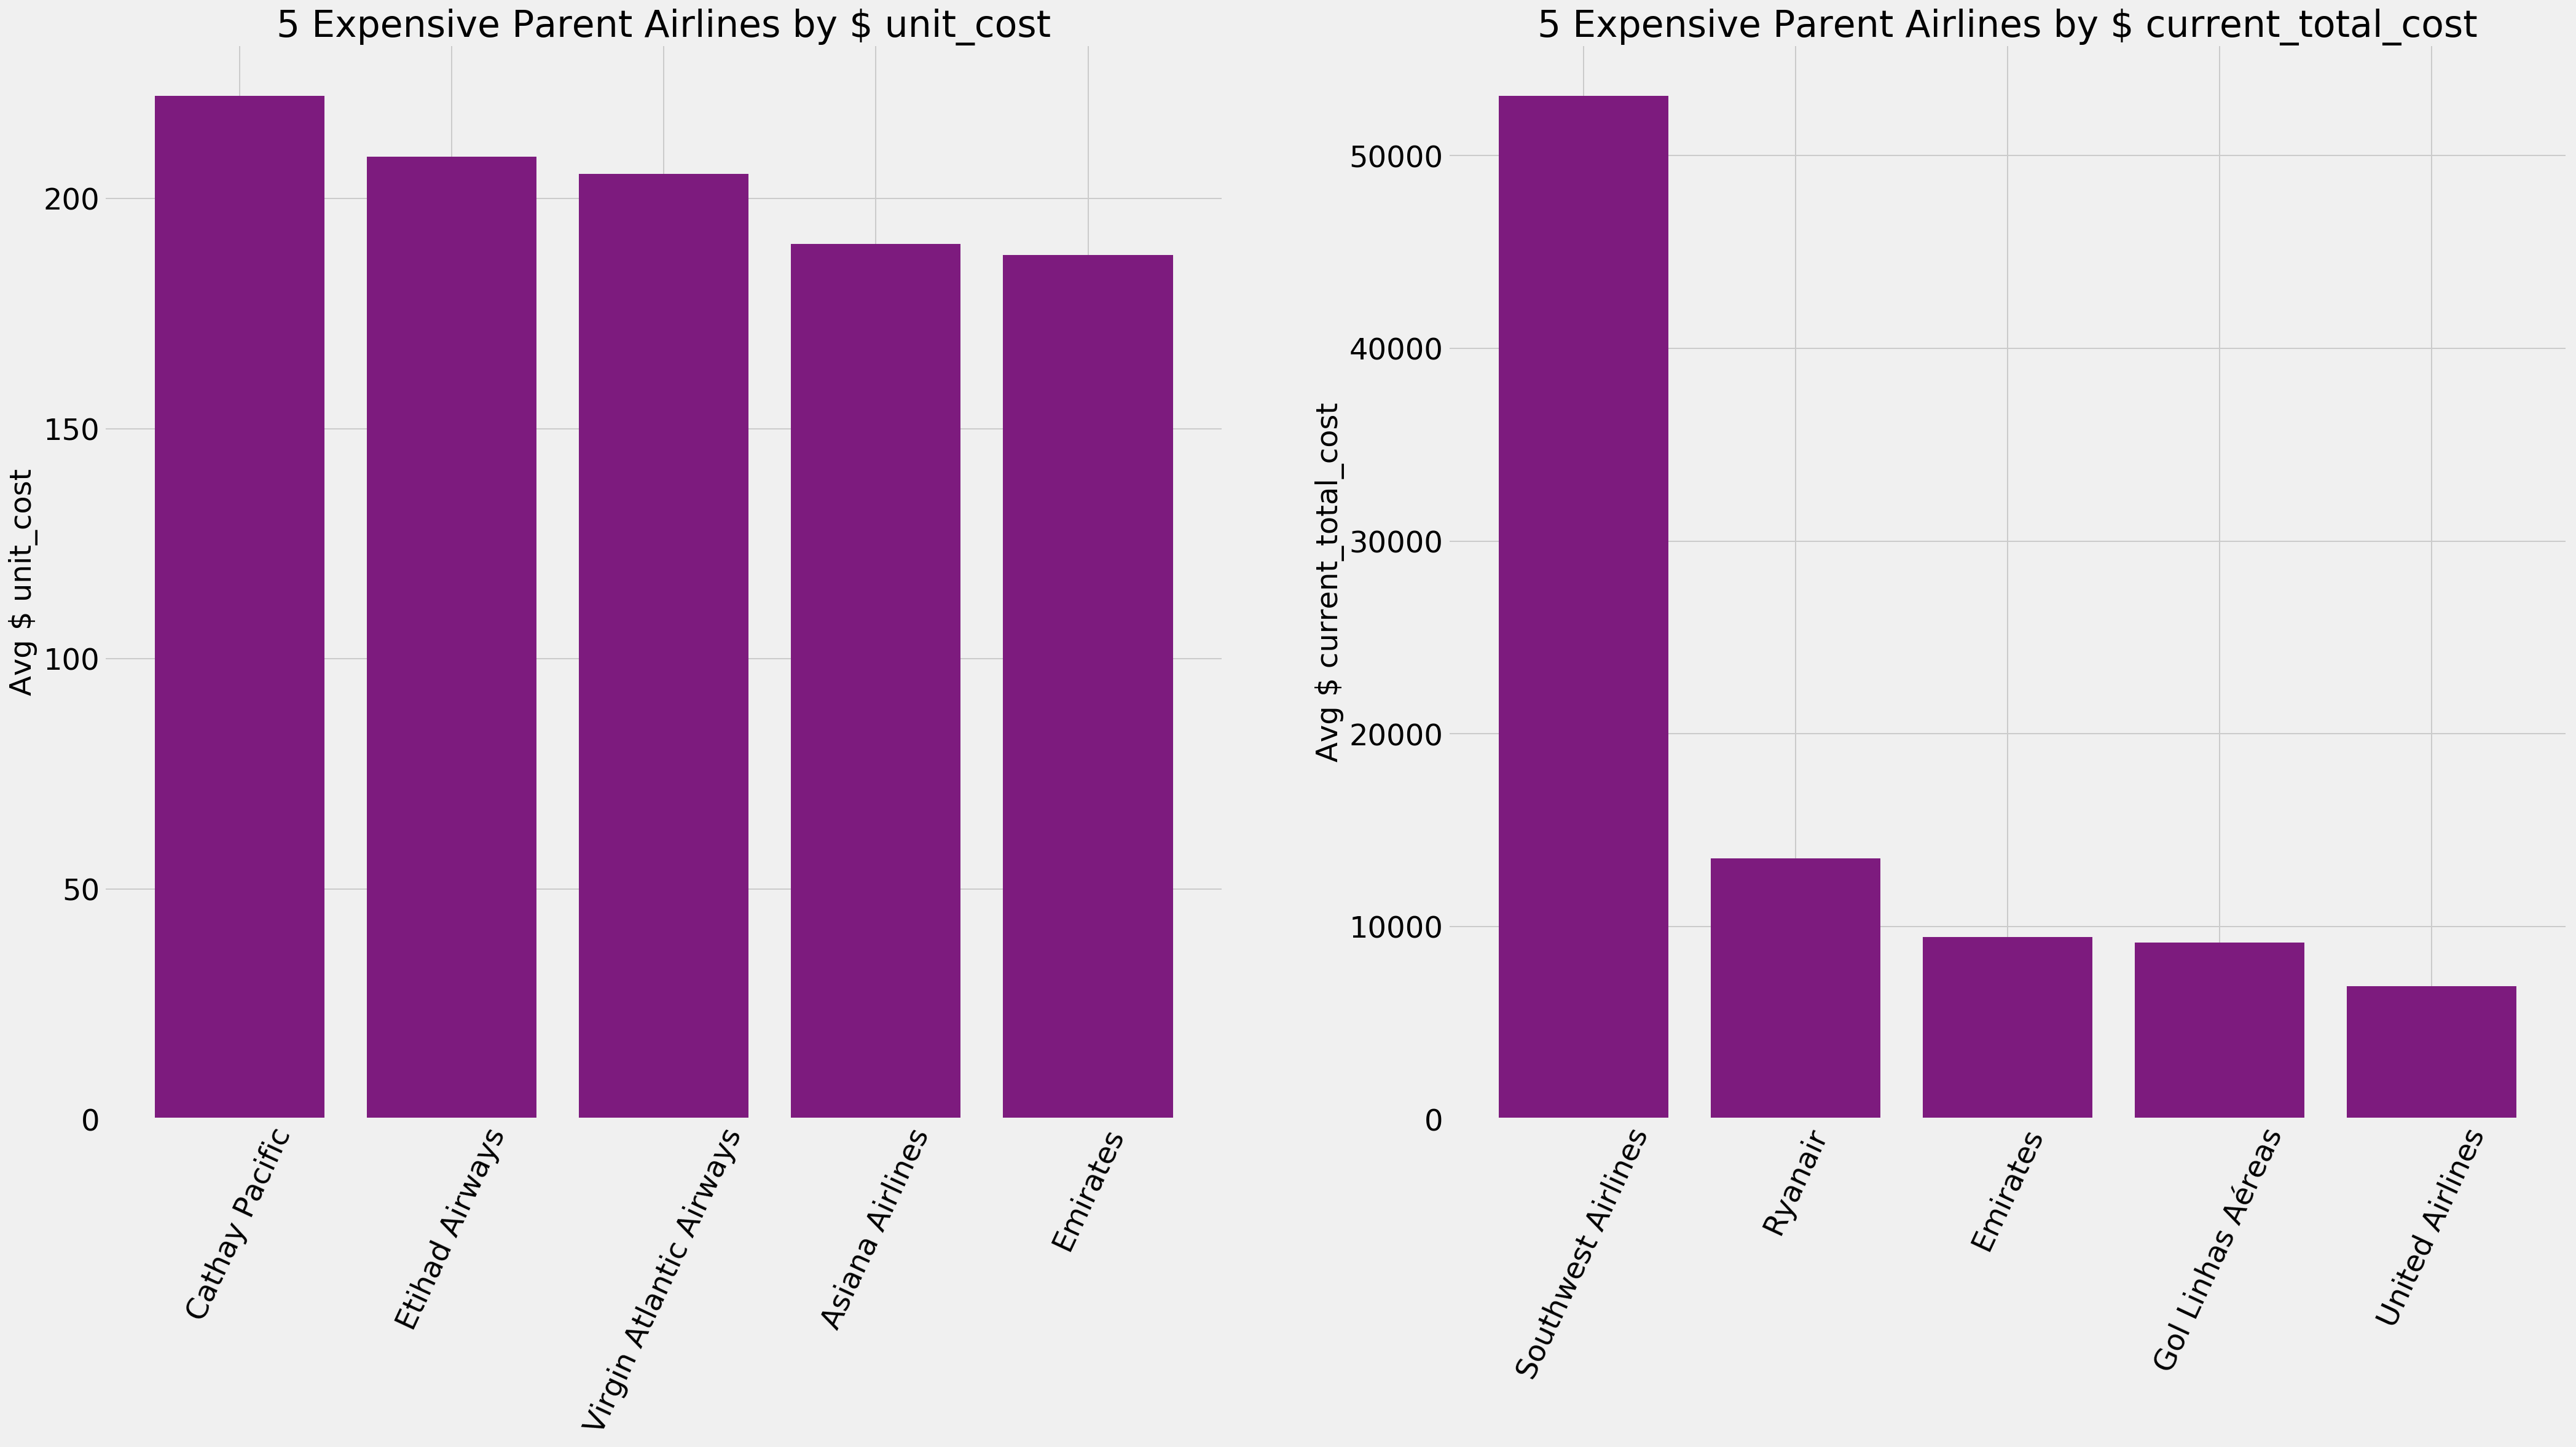

In [384]:
def subplot_bar(dataframe, list_of_columns, figsize_height = 15):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(figsize=(32,figsize_height),nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].bar(dataframe.groupby('parent_airline').mean()[column].sort_values(ascending=False).head().index, 
                       dataframe.groupby('parent_airline').mean()[column].sort_values(ascending=False).head().values, color= DO)
                  
        ax[i].set_title(f'5 Expensive Parent Airlines by \$ {list_of_columns[i]}', fontsize = 30)
        ax[i].set_ylabel(f'Avg \$ {list_of_columns[i]}', fontsize = 24)
        ax[i].tick_params(axis='x',labelsize=24, rotation=65)
        ax[i].tick_params(axis='y',labelsize=24)
        
subplot_bar(df,list_of_cols_2.columns)

**Top 5 Most Cheapest Parent Airlines (by \$ Unit Cost & Current Total Cost of Airplanes)**

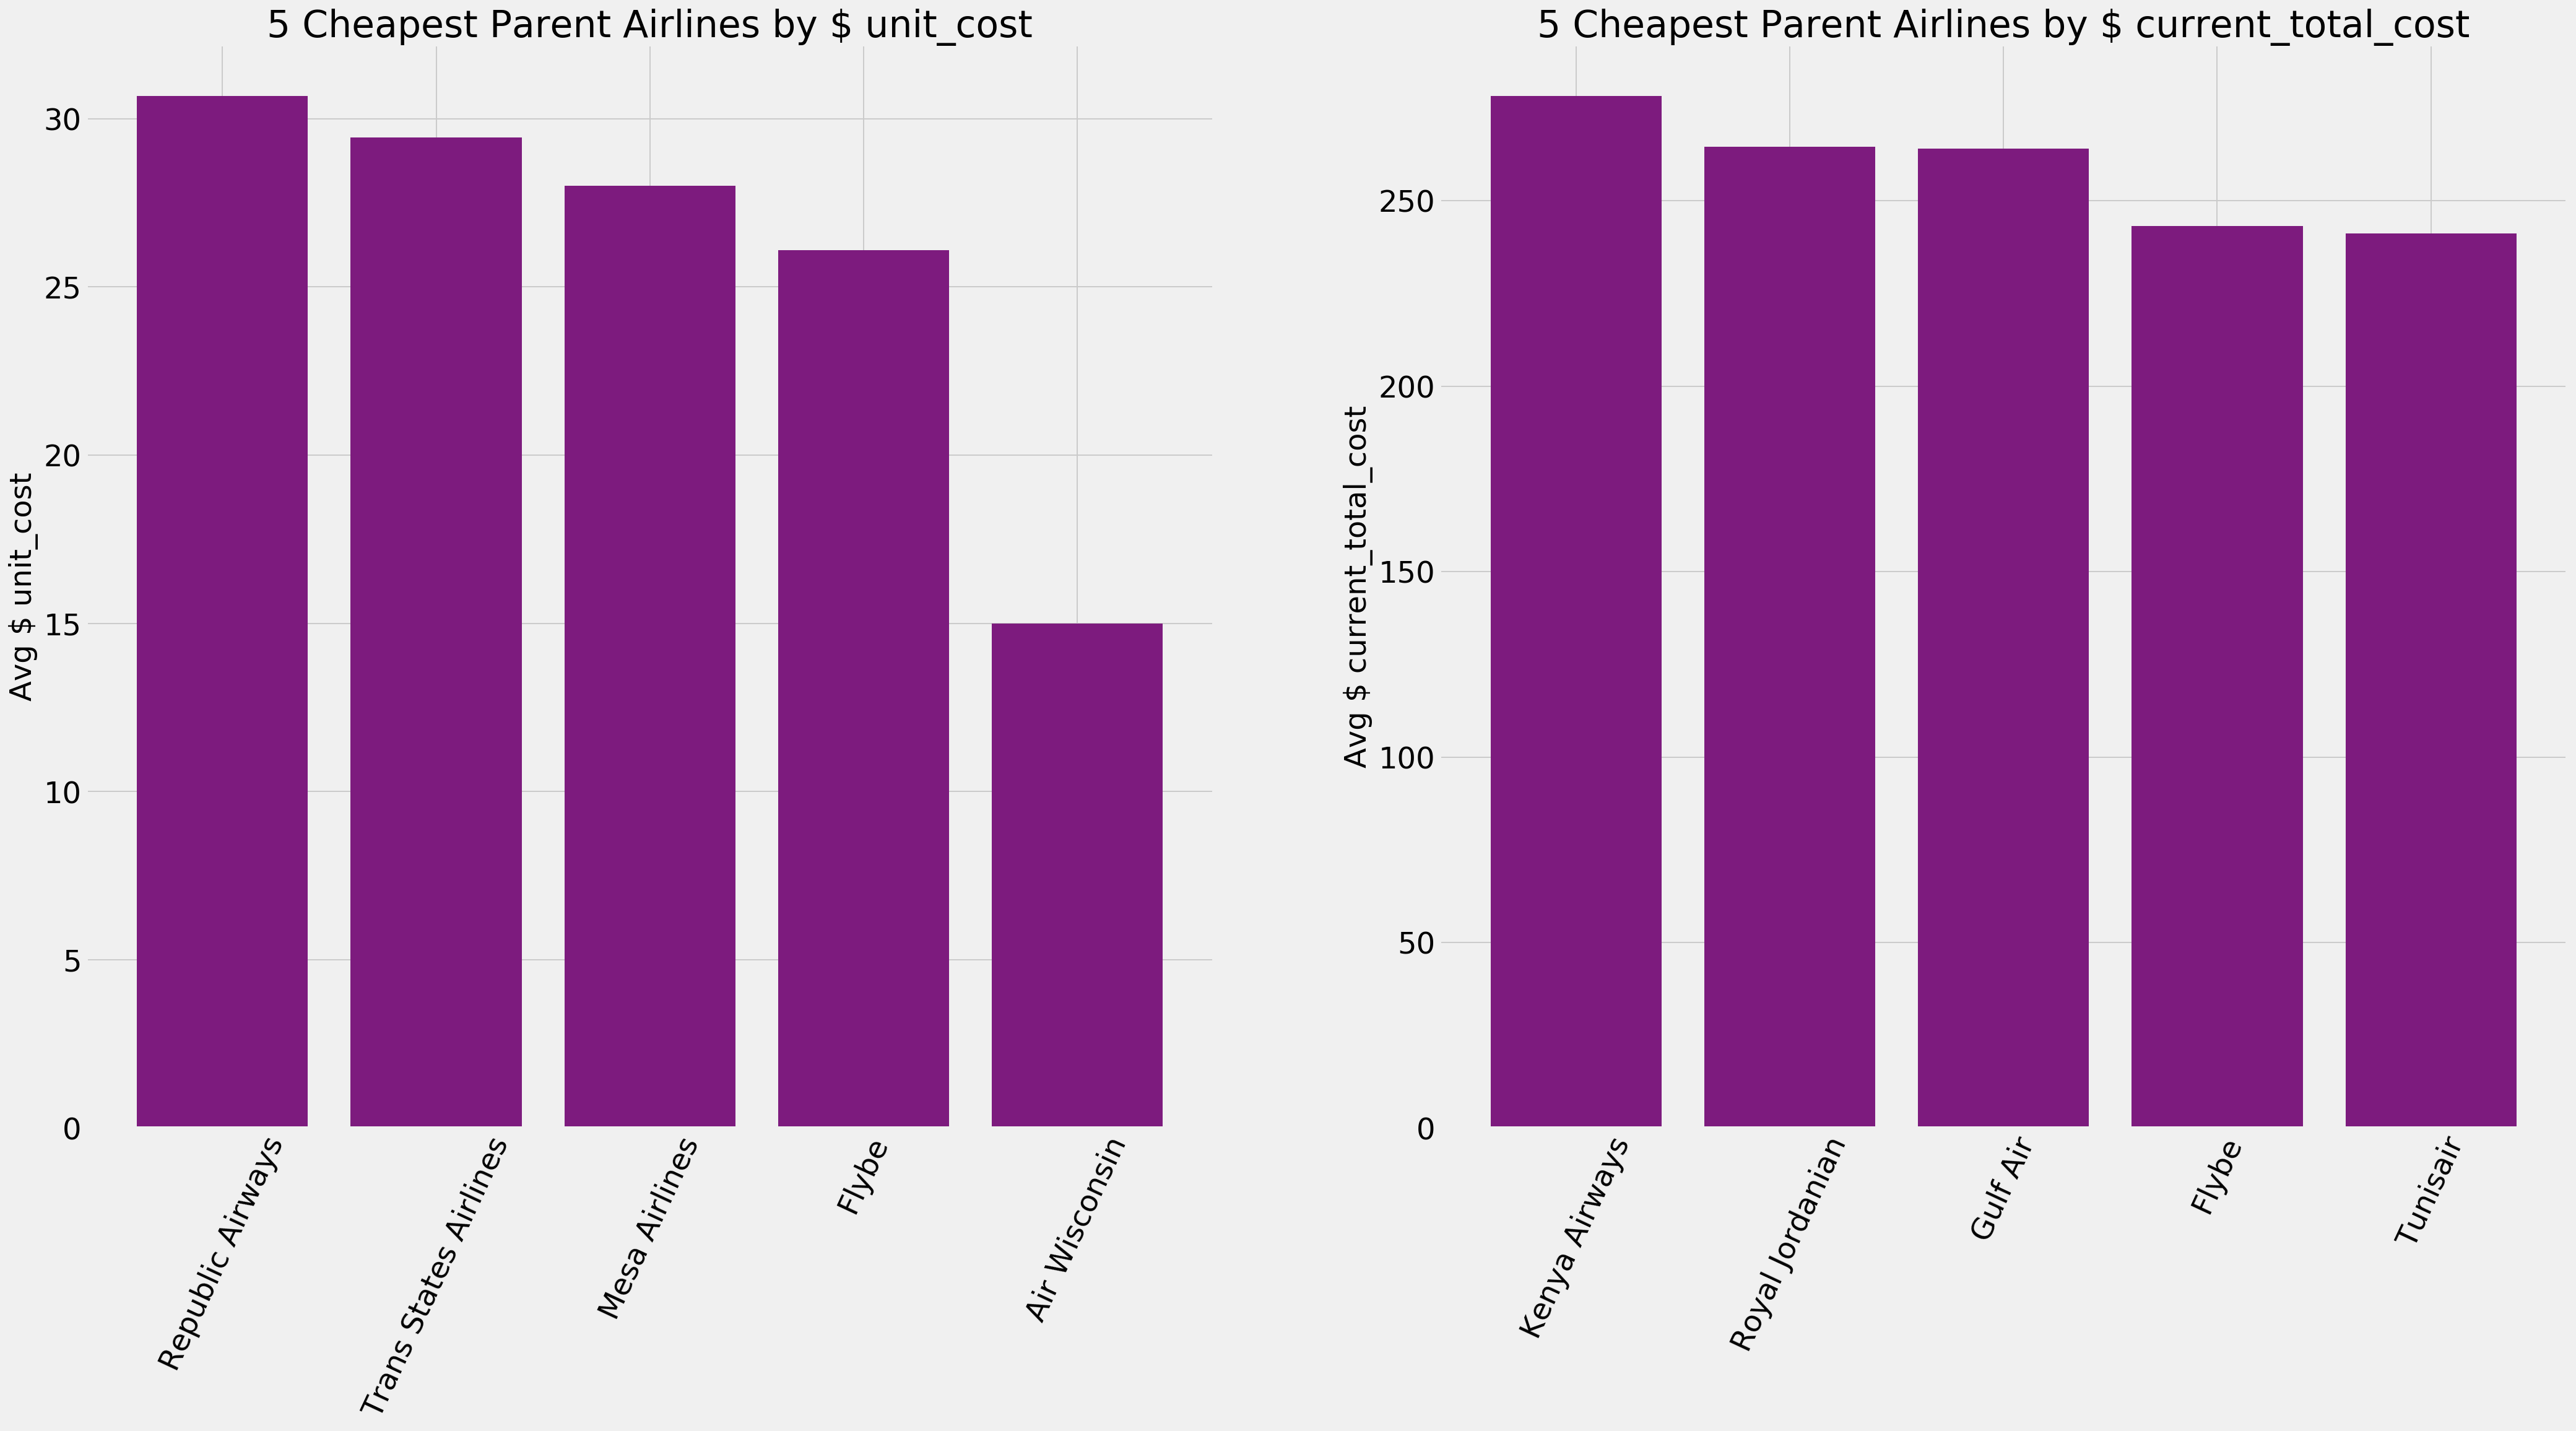

In [385]:
def subplot_bar(dataframe, list_of_columns, figsize_height = 15):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(figsize=(32,figsize_height),nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].bar(dataframe.groupby('parent_airline').mean()[column].sort_values(ascending=False).tail().index, 
                       dataframe.groupby('parent_airline').mean()[column].sort_values(ascending=False).tail().values, color= DO)
                  
        ax[i].set_title(f'5 Cheapest Parent Airlines by \$ {list_of_columns[i]}', fontsize = 30)
        ax[i].set_ylabel(f'Avg \$ {list_of_columns[i]}', fontsize = 24)
        ax[i].tick_params(axis='x',labelsize=24, rotation=65)
        ax[i].tick_params(axis='y',labelsize=24)
        
subplot_bar(df,list_of_cols_2.columns)

**Top 5 Most Expensive Airlines (by \$ Unit Cost & Current Total Cost of Airplanes)**
* Majority of the most expensive airlines are newer to average in age. In most cases, many of the older airlines are much cheaper than the much newer Airlines.
* Due to the very expensive price, we can assume that it is not as common among airlines for them to have airlines such as: Cathay Pacific, Norwegian Long Haul, AirAsia X, and LATAM Cargo Chile X

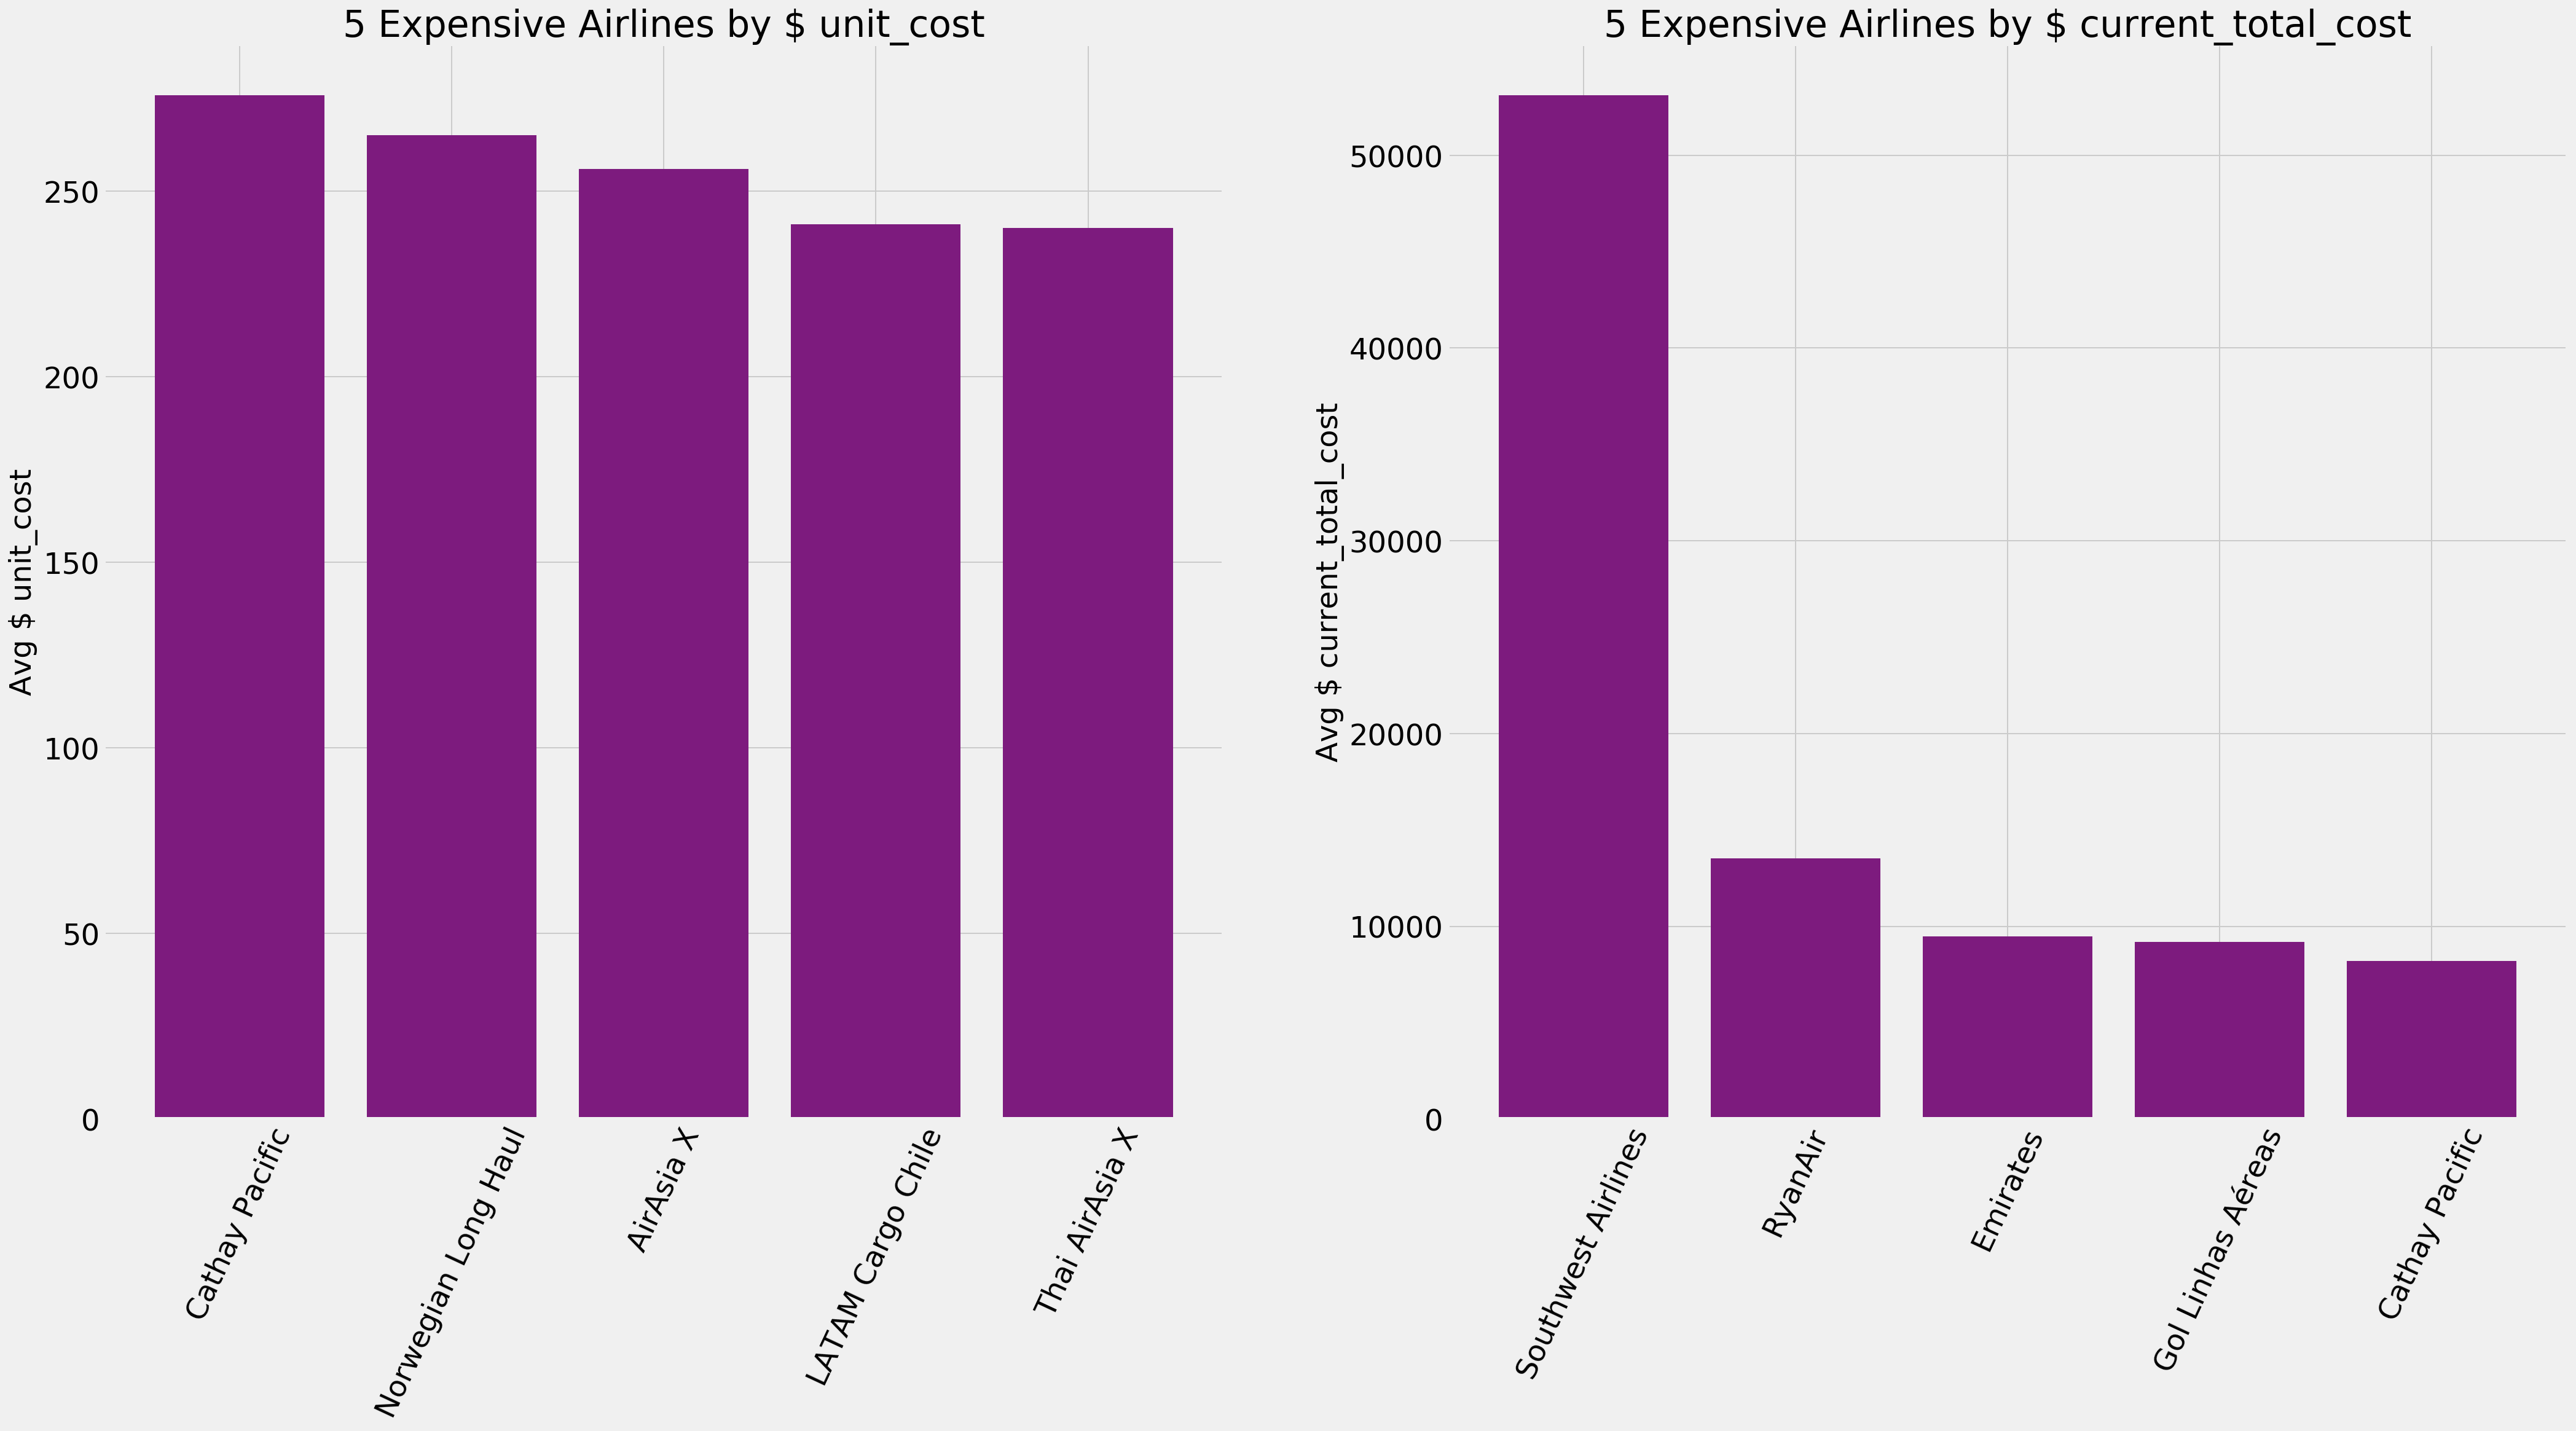

In [383]:
def subplot_bar(dataframe, list_of_columns, figsize_height = 15):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(figsize=(32,figsize_height),nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].bar(dataframe.groupby('airline').mean()[column].sort_values(ascending=False).head().index, 
                       dataframe.groupby('airline').mean()[column].sort_values(ascending=False).head().values, color= DO)
                  
        ax[i].set_title(f'5 Expensive Airlines by \$ {list_of_columns[i]}', fontsize = 30)
        ax[i].set_ylabel(f'Avg \$ {list_of_columns[i]}', fontsize = 24)
        ax[i].tick_params(axis='x',labelsize=24, rotation=65)
        ax[i].tick_params(axis='y',labelsize=24)
        
subplot_bar(df,list_of_cols_2.columns)

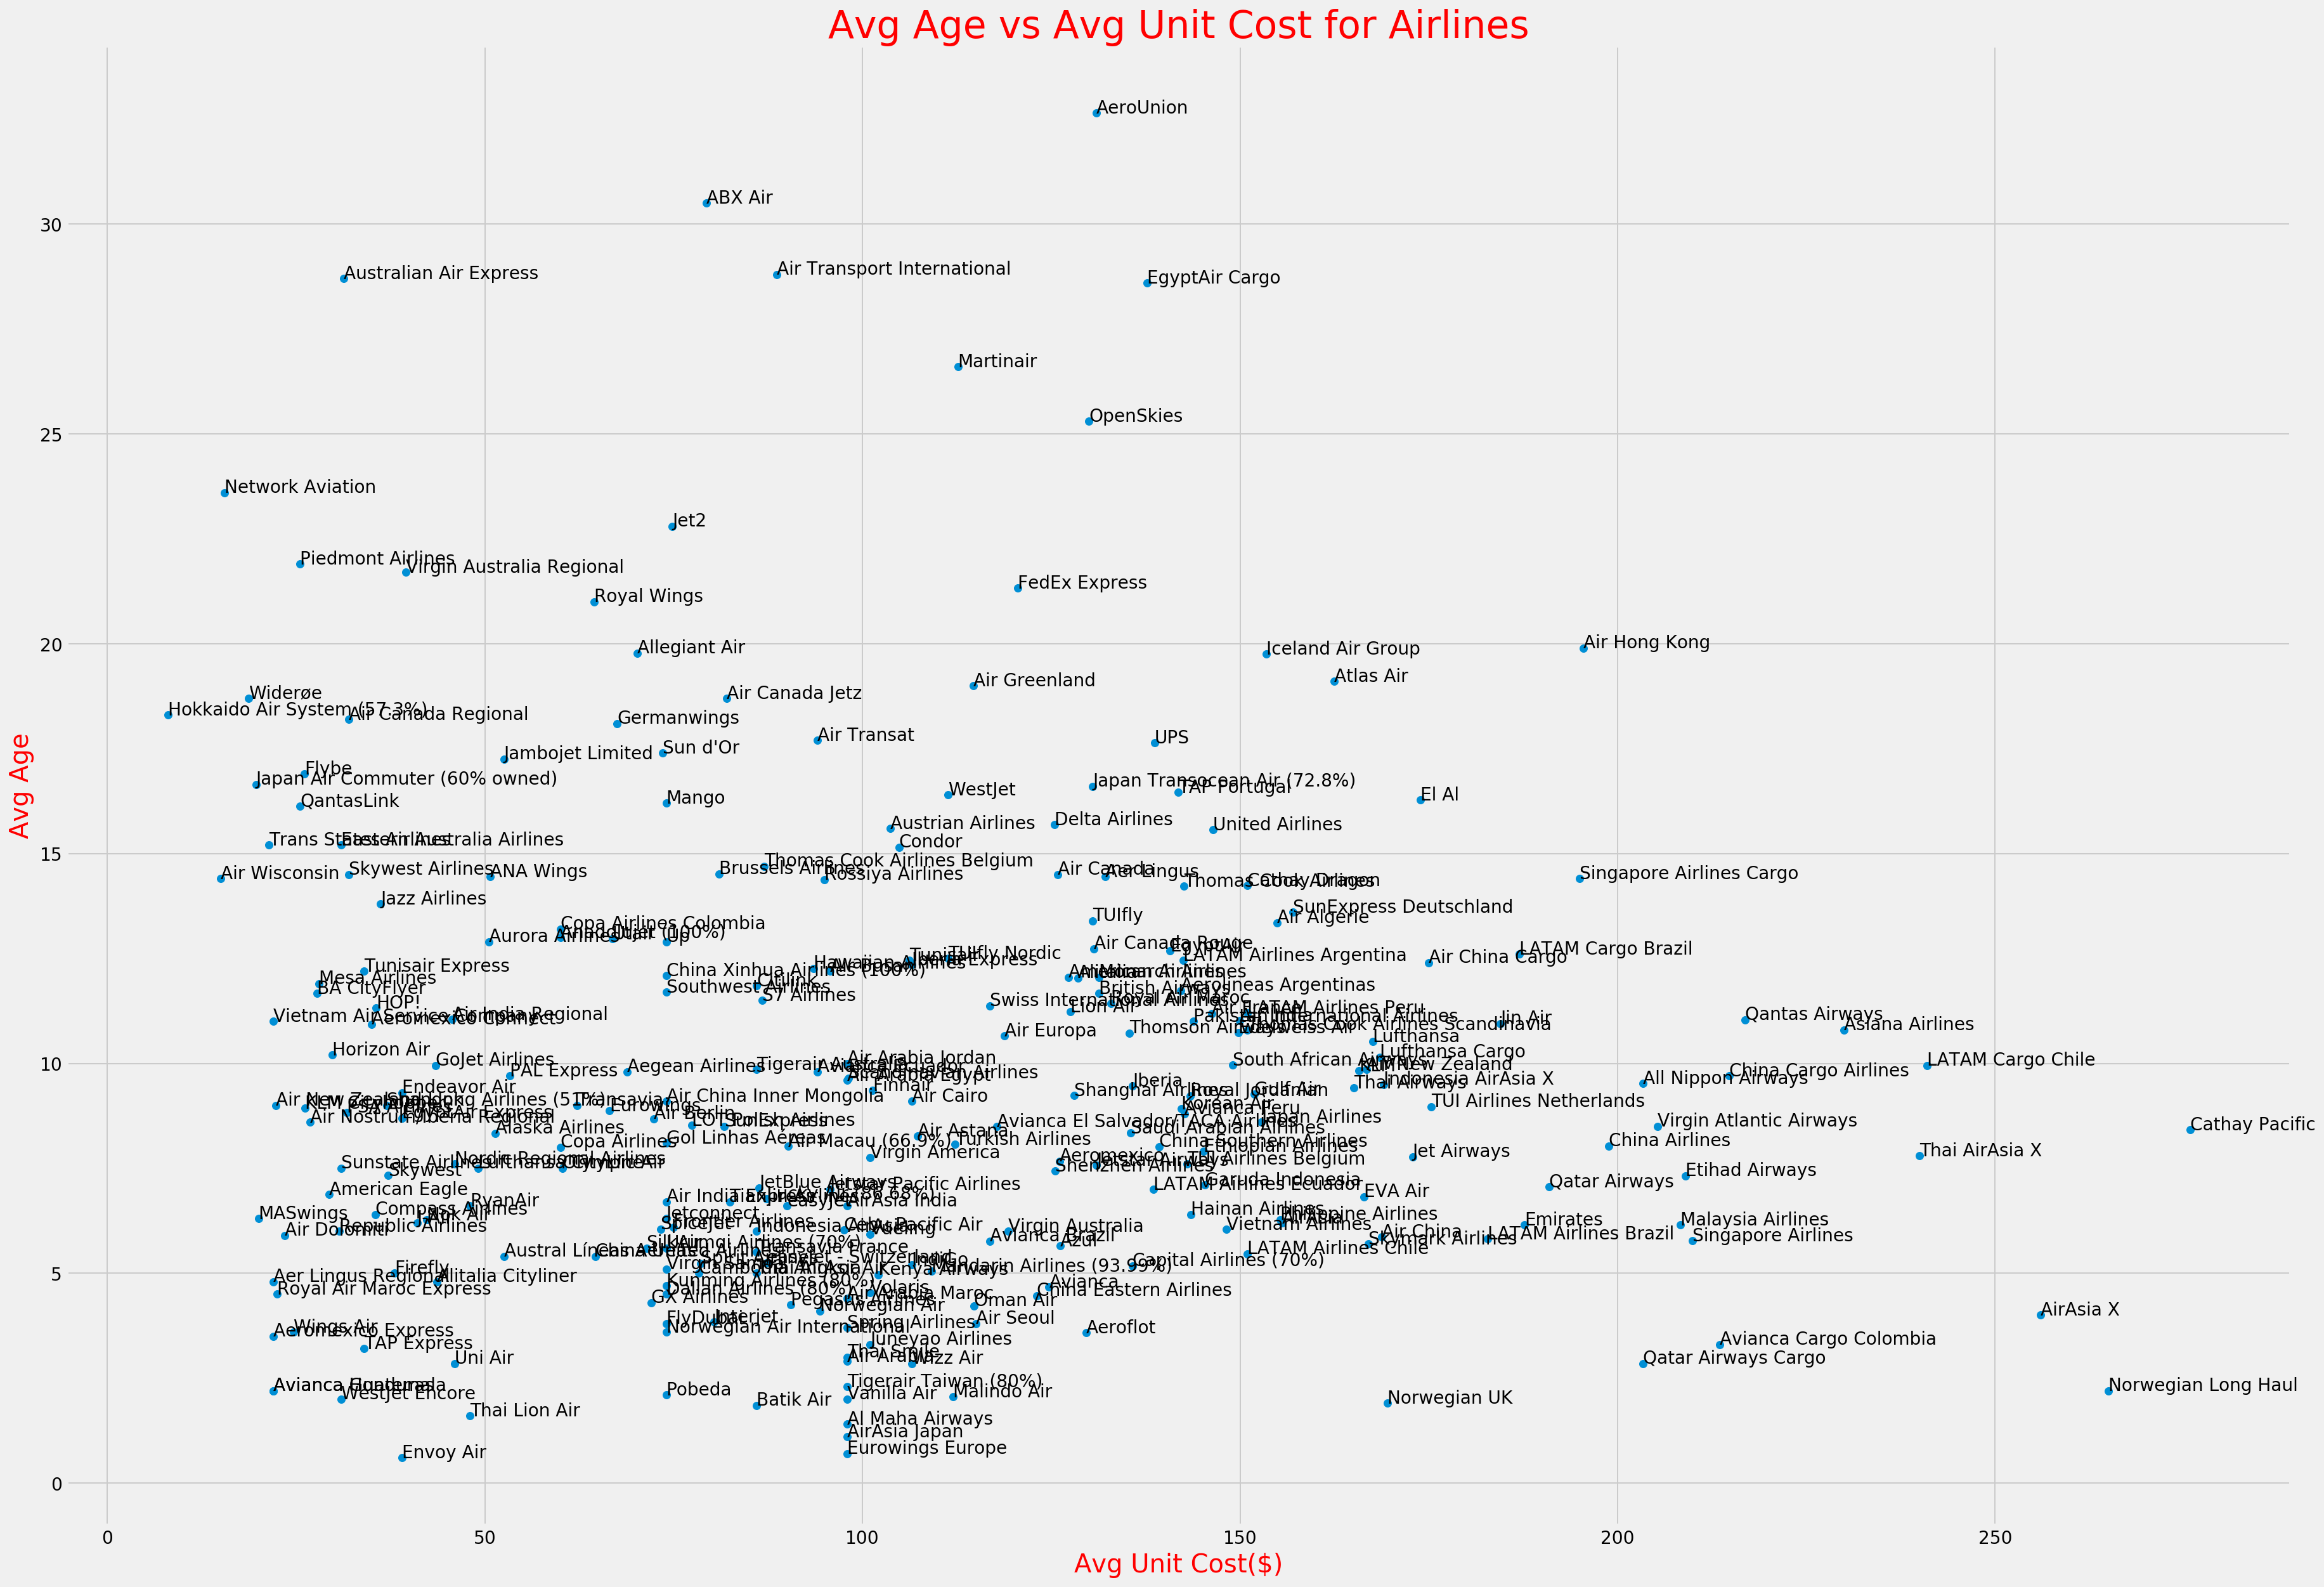

In [386]:
y = df.groupby('airline').mean()['average_age'].values
x = df.groupby('airline').mean()['unit_cost'].values
n = df.groupby('airline').mean()['average_age']

fig, ax = plt.subplots(figsize=(28,20))
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(n.index[i], (x[i], y[i]))
    
plt.title('Avg Age vs Avg Unit Cost for Airlines', fontsize=30, color='r')
plt.ylabel('Avg Age', fontsize=20, color='r')
plt.xlabel('Avg Unit Cost(\$)', fontsize=20, color='r');

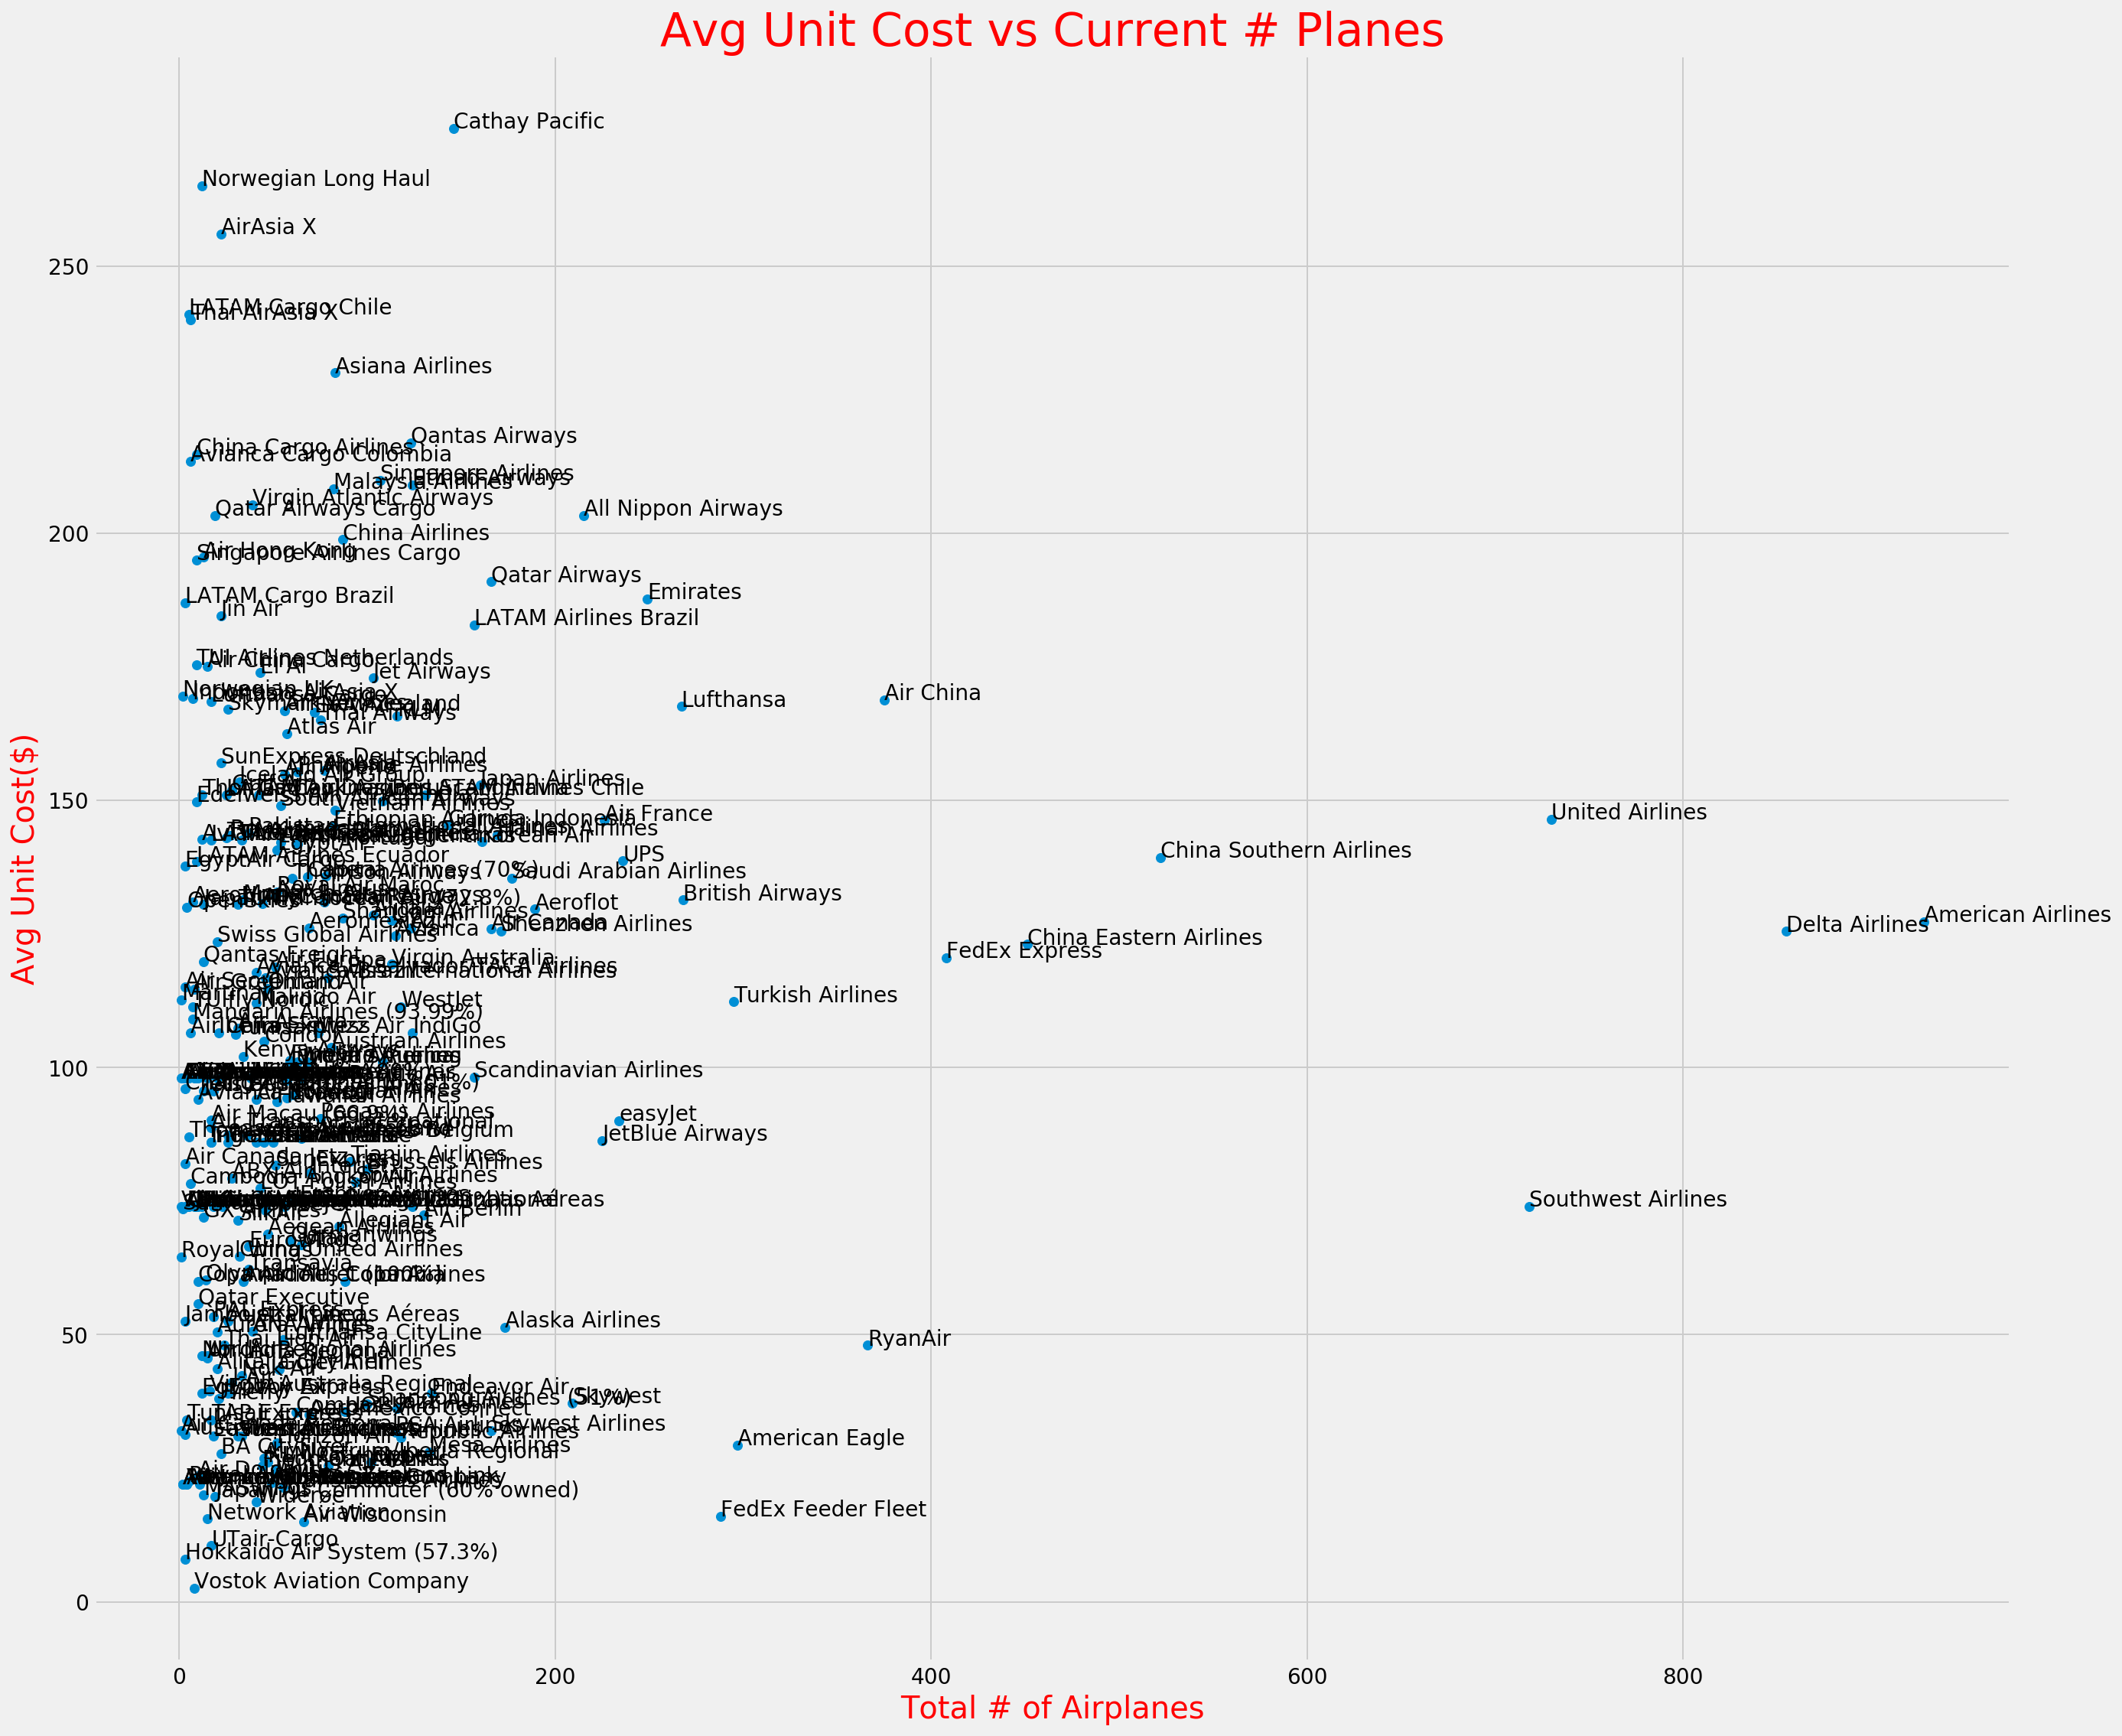

In [265]:
y = df.groupby('airline').mean()['unit_cost'].values
x = df.groupby('airline').sum()['current'].values
n = df.groupby('airline').mean()['unit_cost']

fig, ax = plt.subplots(figsize=(20,18))
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(n.index[i], (x[i], y[i]))
    
plt.title('Avg Unit Cost vs Current # Planes', fontsize=30, color='r')
plt.ylabel('Avg Unit Cost(\$)', fontsize=20, color='r')
plt.xlabel('Total # of Airplanes', fontsize=20, color='r');

------
**Top 5 Expensive AirCrafts (by \$ Unit Cost & Current Total Cost of Airplanes)**

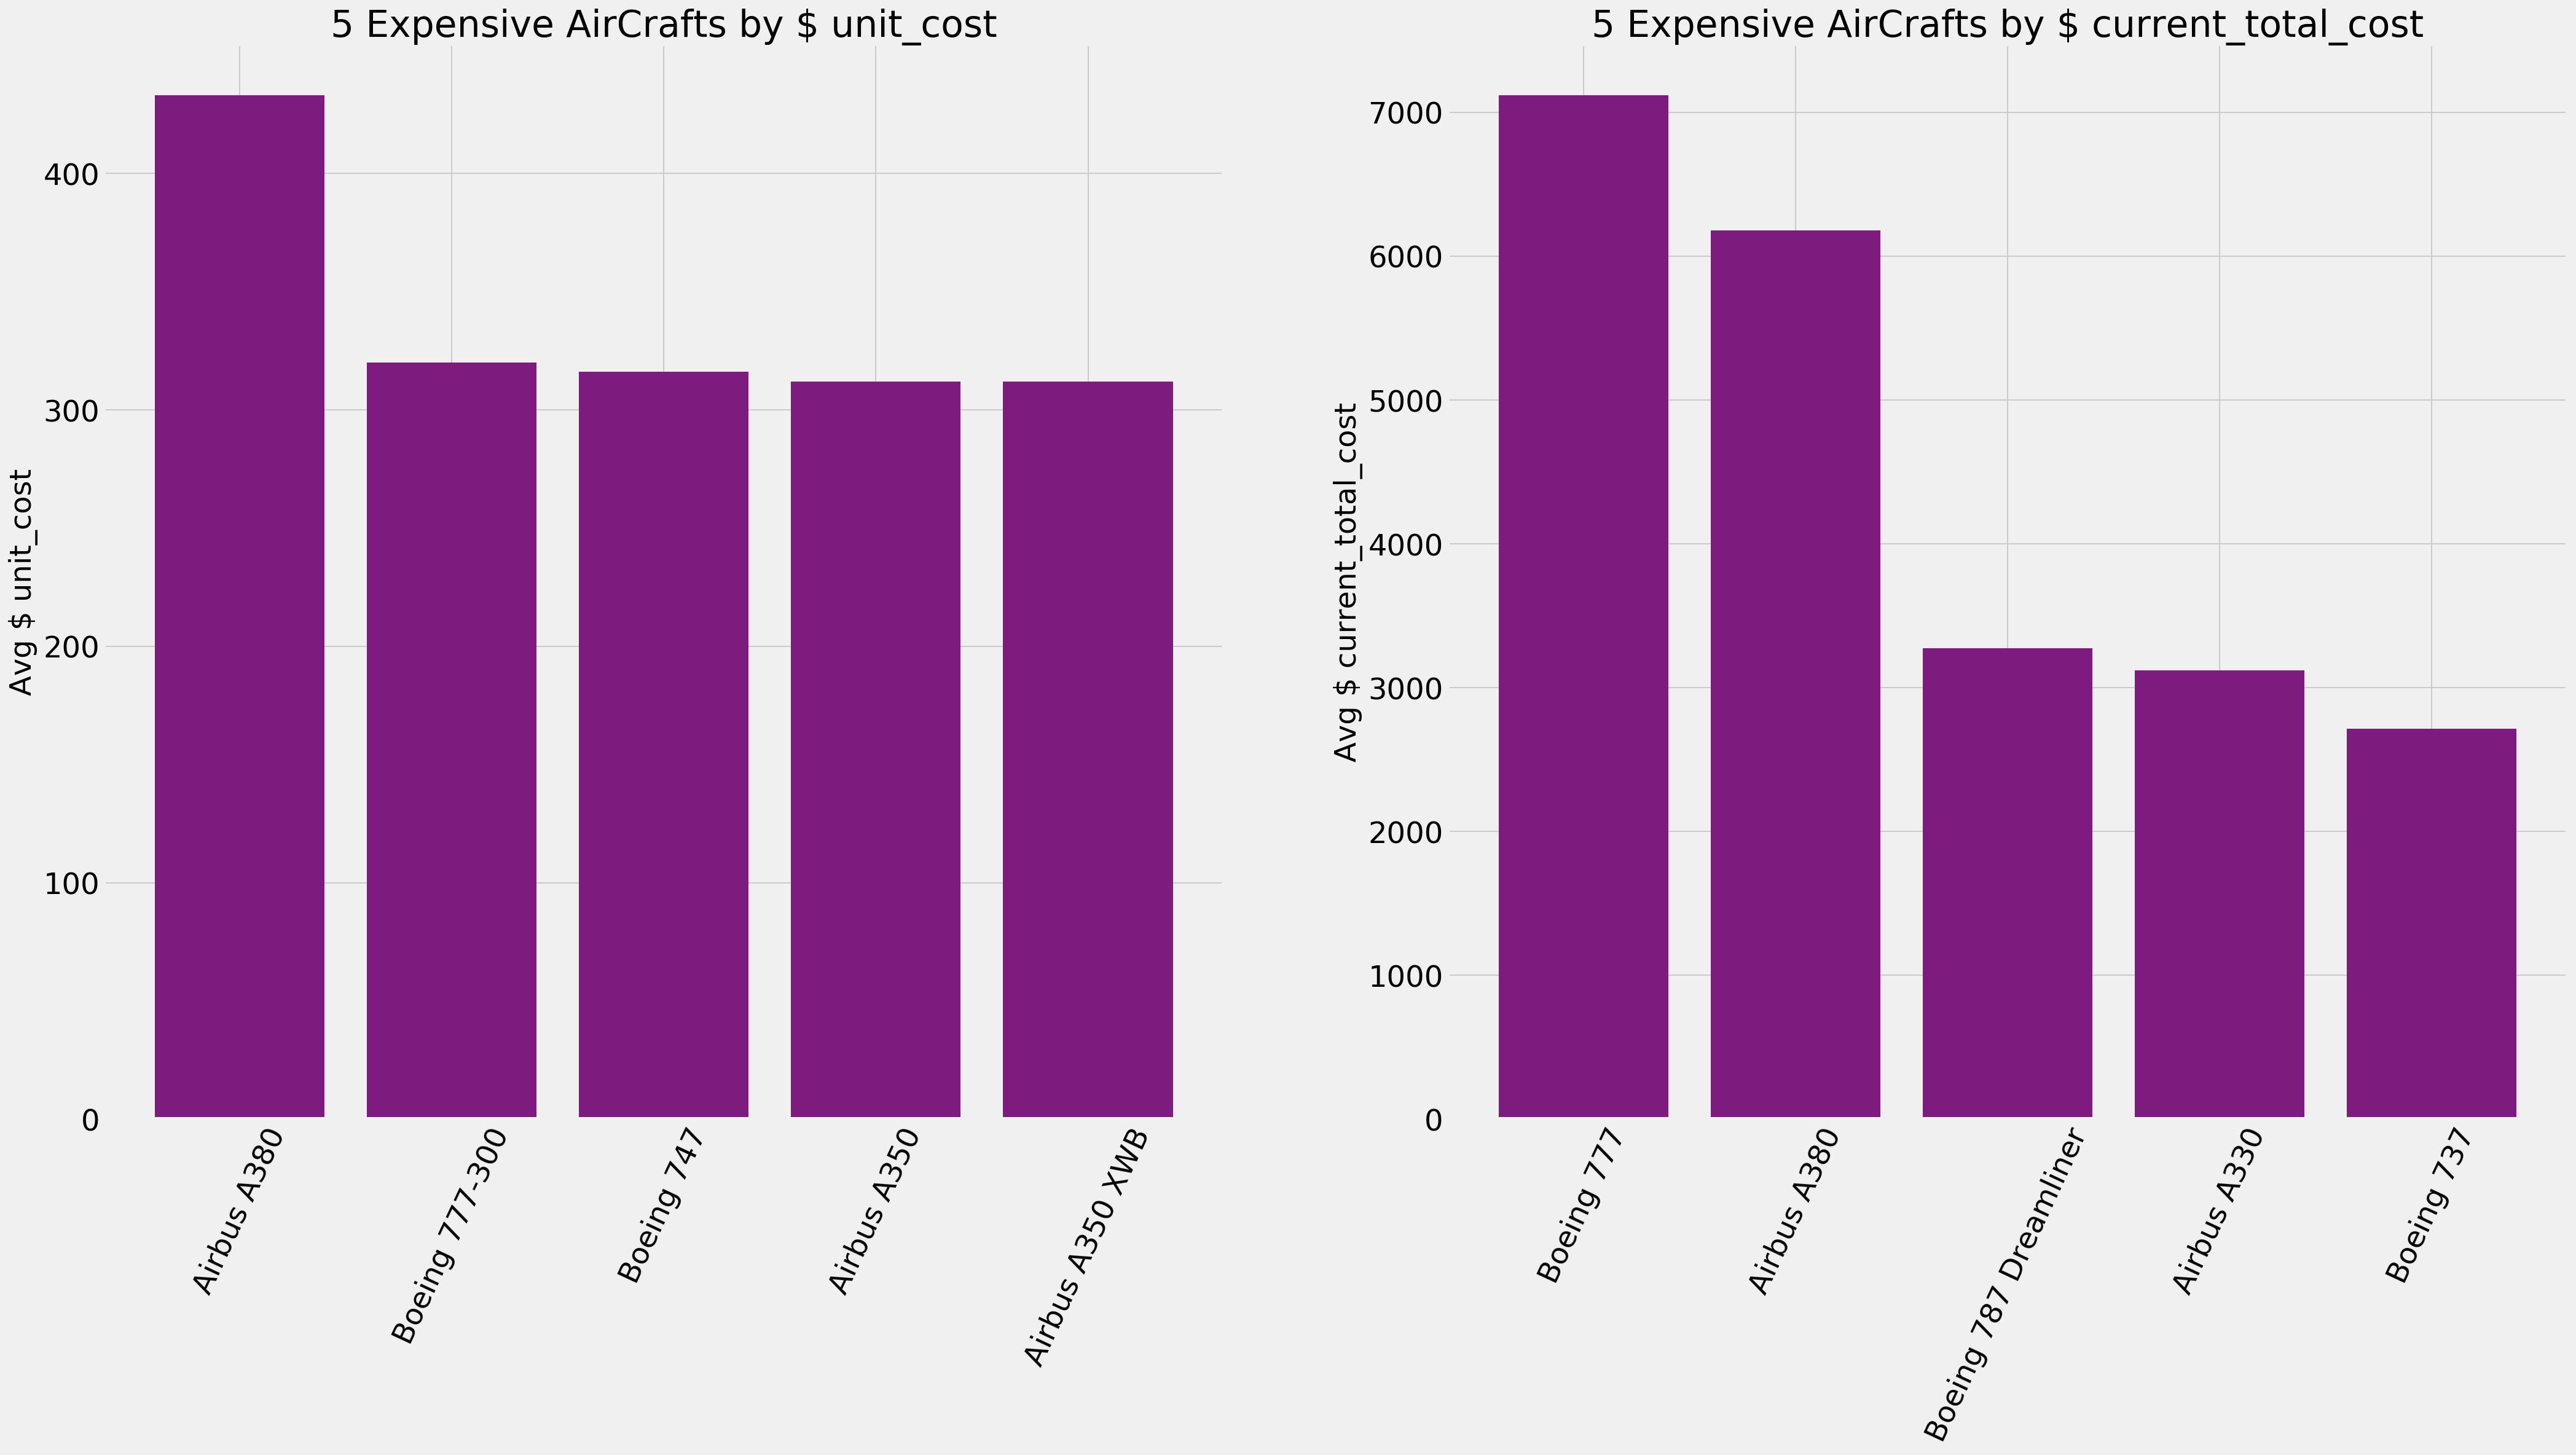

In [387]:
def subplot_bar(dataframe, list_of_columns, figsize_height = 15):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(figsize=(32,figsize_height),nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].bar(dataframe.groupby('aircraft_type').mean()[column].sort_values(ascending=False).head().index, 
                       dataframe.groupby('aircraft_type').mean()[column].sort_values(ascending=False).head().values, color= DO)
                  
        ax[i].set_title(f'5 Expensive AirCrafts by \$ {list_of_columns[i]}', fontsize = 30)
        ax[i].set_ylabel(f'Avg \$ {list_of_columns[i]}', fontsize = 24)
        ax[i].tick_params(axis='x',labelsize=24, rotation=65)
        ax[i].tick_params(axis='y',labelsize=24)
        
subplot_bar(df,list_of_cols_2.columns)

**Top 5 Cheapest AirCrafts (by \$ Unit Cost & Current Total Cost of Airplanes)**

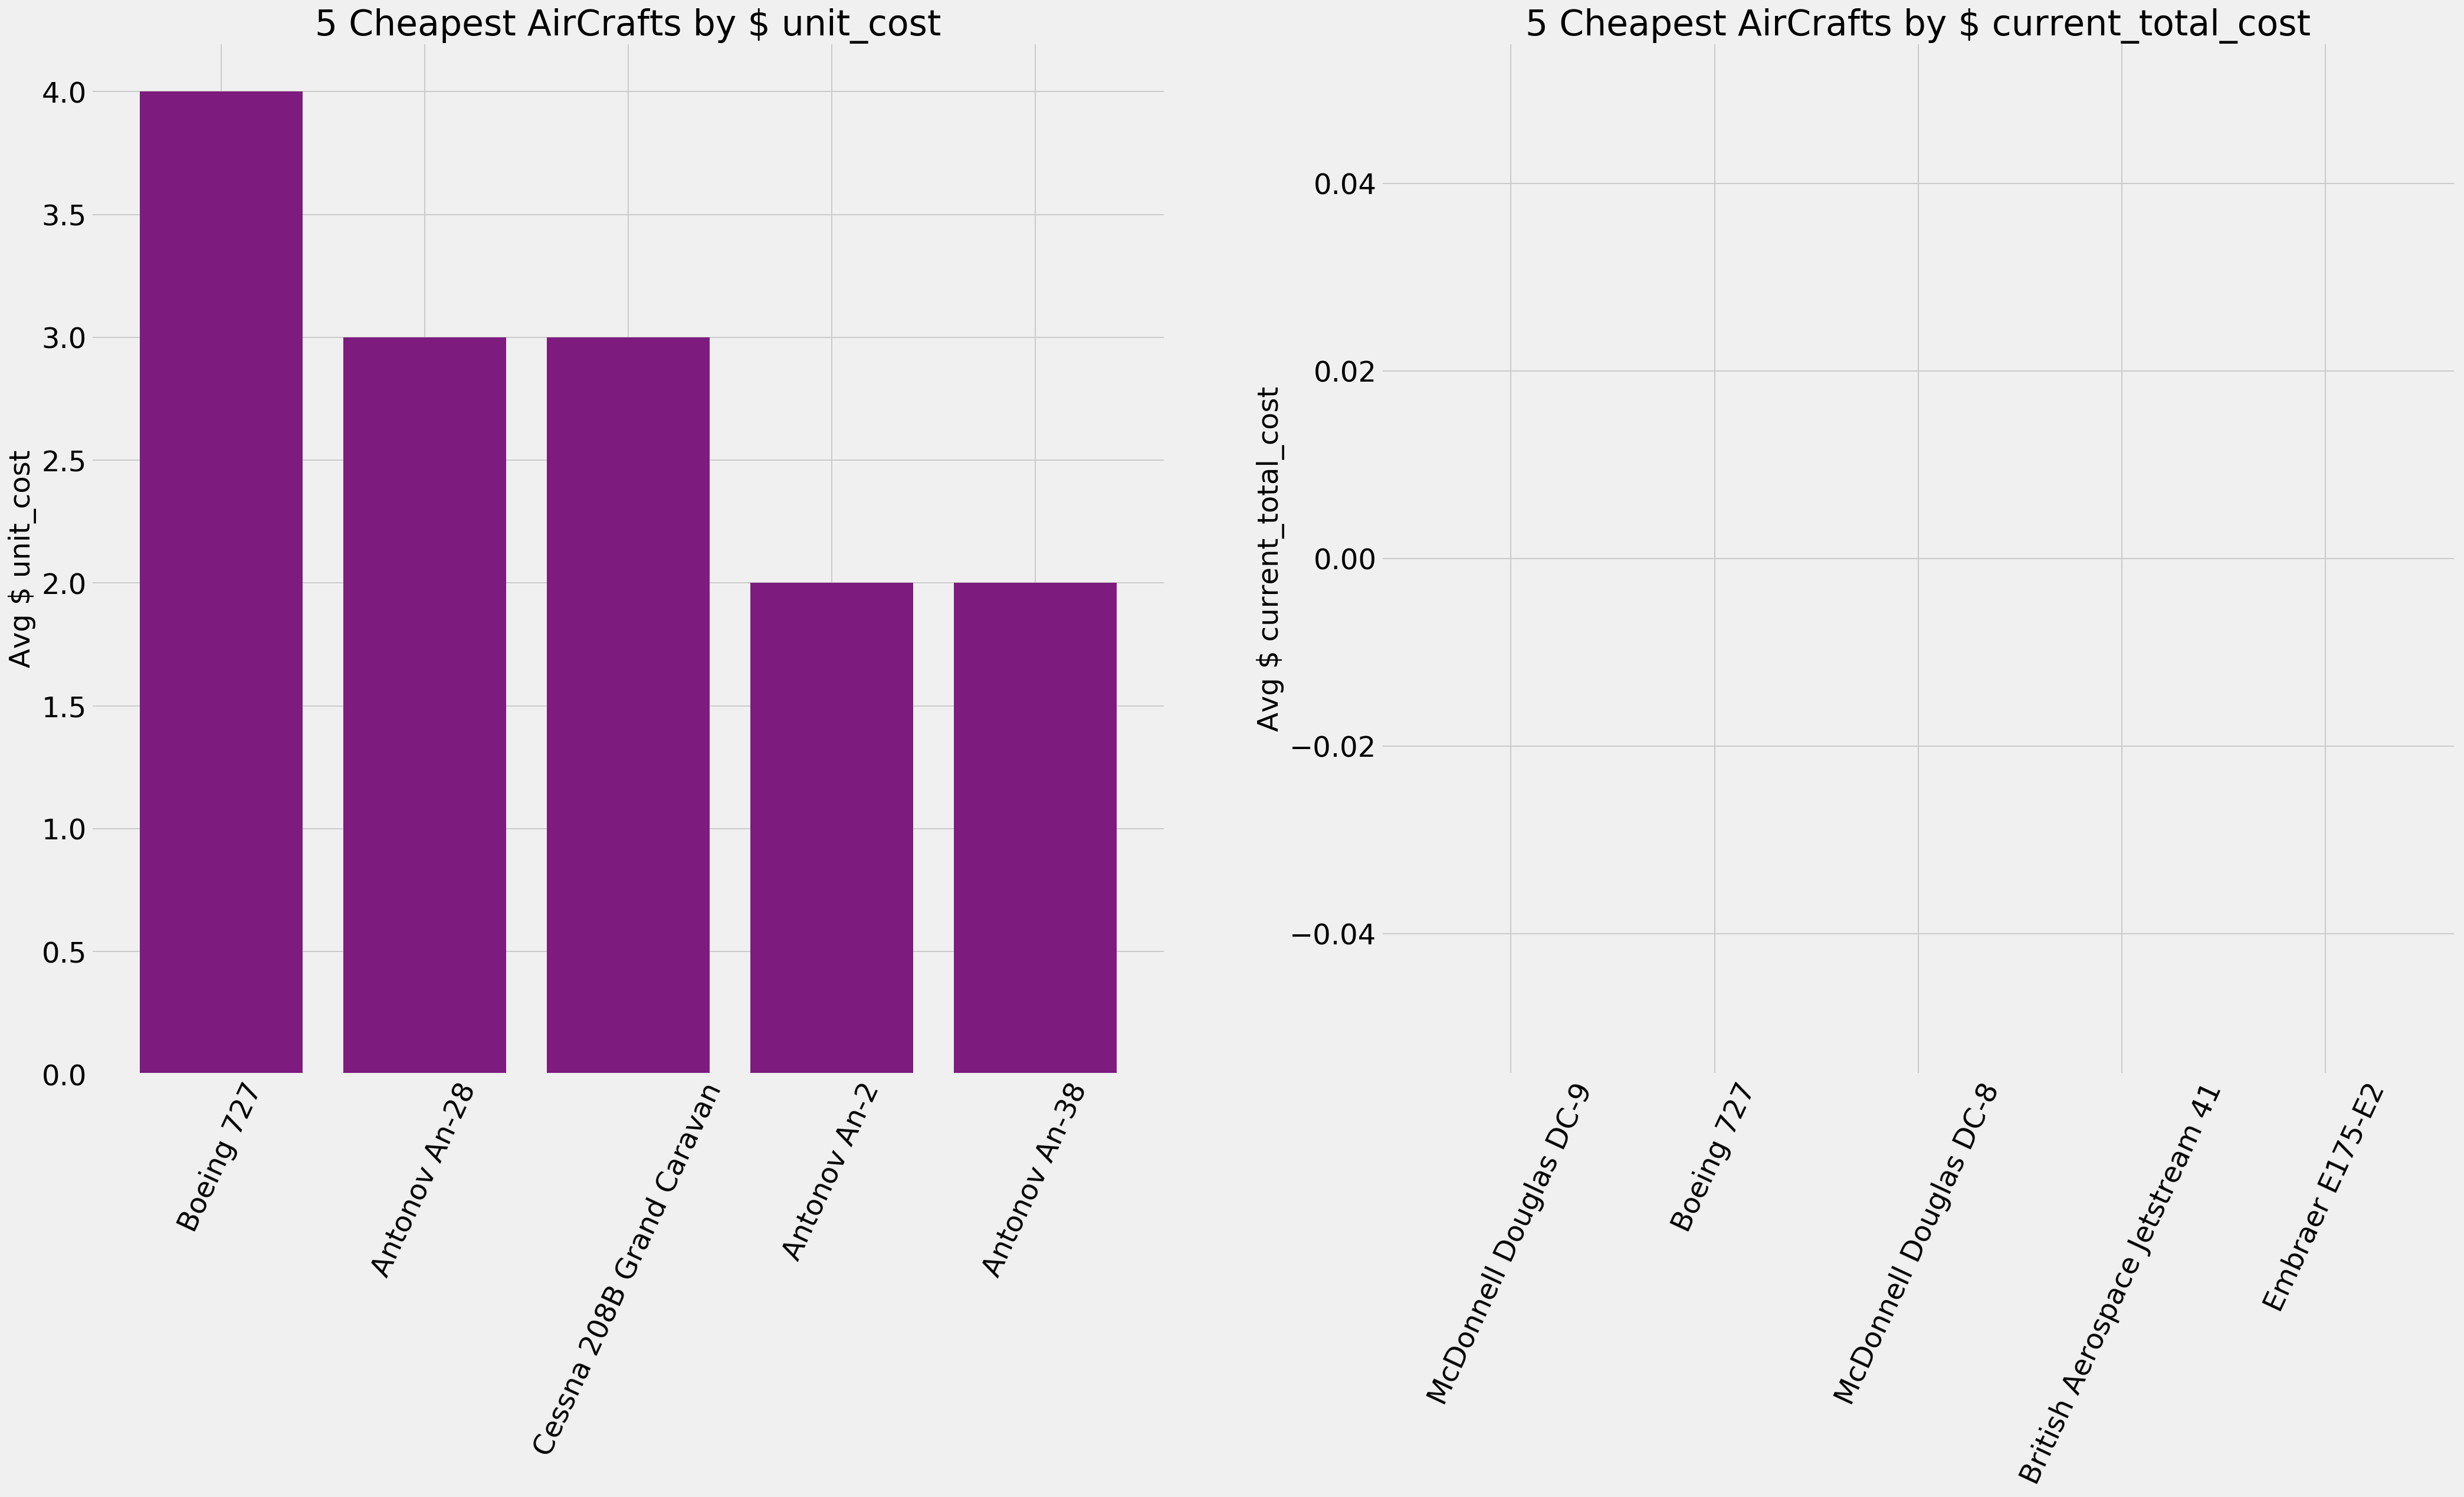

In [388]:
def subplot_bar(dataframe, list_of_columns, figsize_height = 15):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(figsize=(32,figsize_height),nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].bar(dataframe.groupby('aircraft_type').mean()[column].sort_values(ascending=False).tail().index, 
                       dataframe.groupby('aircraft_type').mean()[column].sort_values(ascending=False).tail().values, color= DO)
                  
        ax[i].set_title(f'5 Cheapest AirCrafts by \$ {list_of_columns[i]}', fontsize = 30)
        ax[i].set_ylabel(f'Avg \$ {list_of_columns[i]}', fontsize = 24)
        ax[i].tick_params(axis='x',labelsize=24, rotation=65)
        ax[i].tick_params(axis='y',labelsize=24)
        
subplot_bar(df,list_of_cols_2.columns)

plt.bar(df.groupby('aircraft_type').mean()['unit_cost'].sort_values(ascending=False).tail().index,
       df.groupby('aircraft_type').mean()['unit_cost'].sort_values(ascending=False).tail().values, color=DO)

### Avg Age of Aircraft Types vs Avg Unit Cost for Aircraft Types:

* Many of the newer aircrafts (within the last 5 years): Boeing 787 Dreamliner, Airbus A350 XWB, Airbus A380, and Bombardier BD-500-CSeries tend to be much more expensive than their counterparts. 
* To no surprise, many of the older aircrafts are much cheaper. 
* Popular and common aircraft types: Boeing 747, Airbus A340, Airbus A330, and Boeing 777 are average age aircraft types and are among the most expensive.

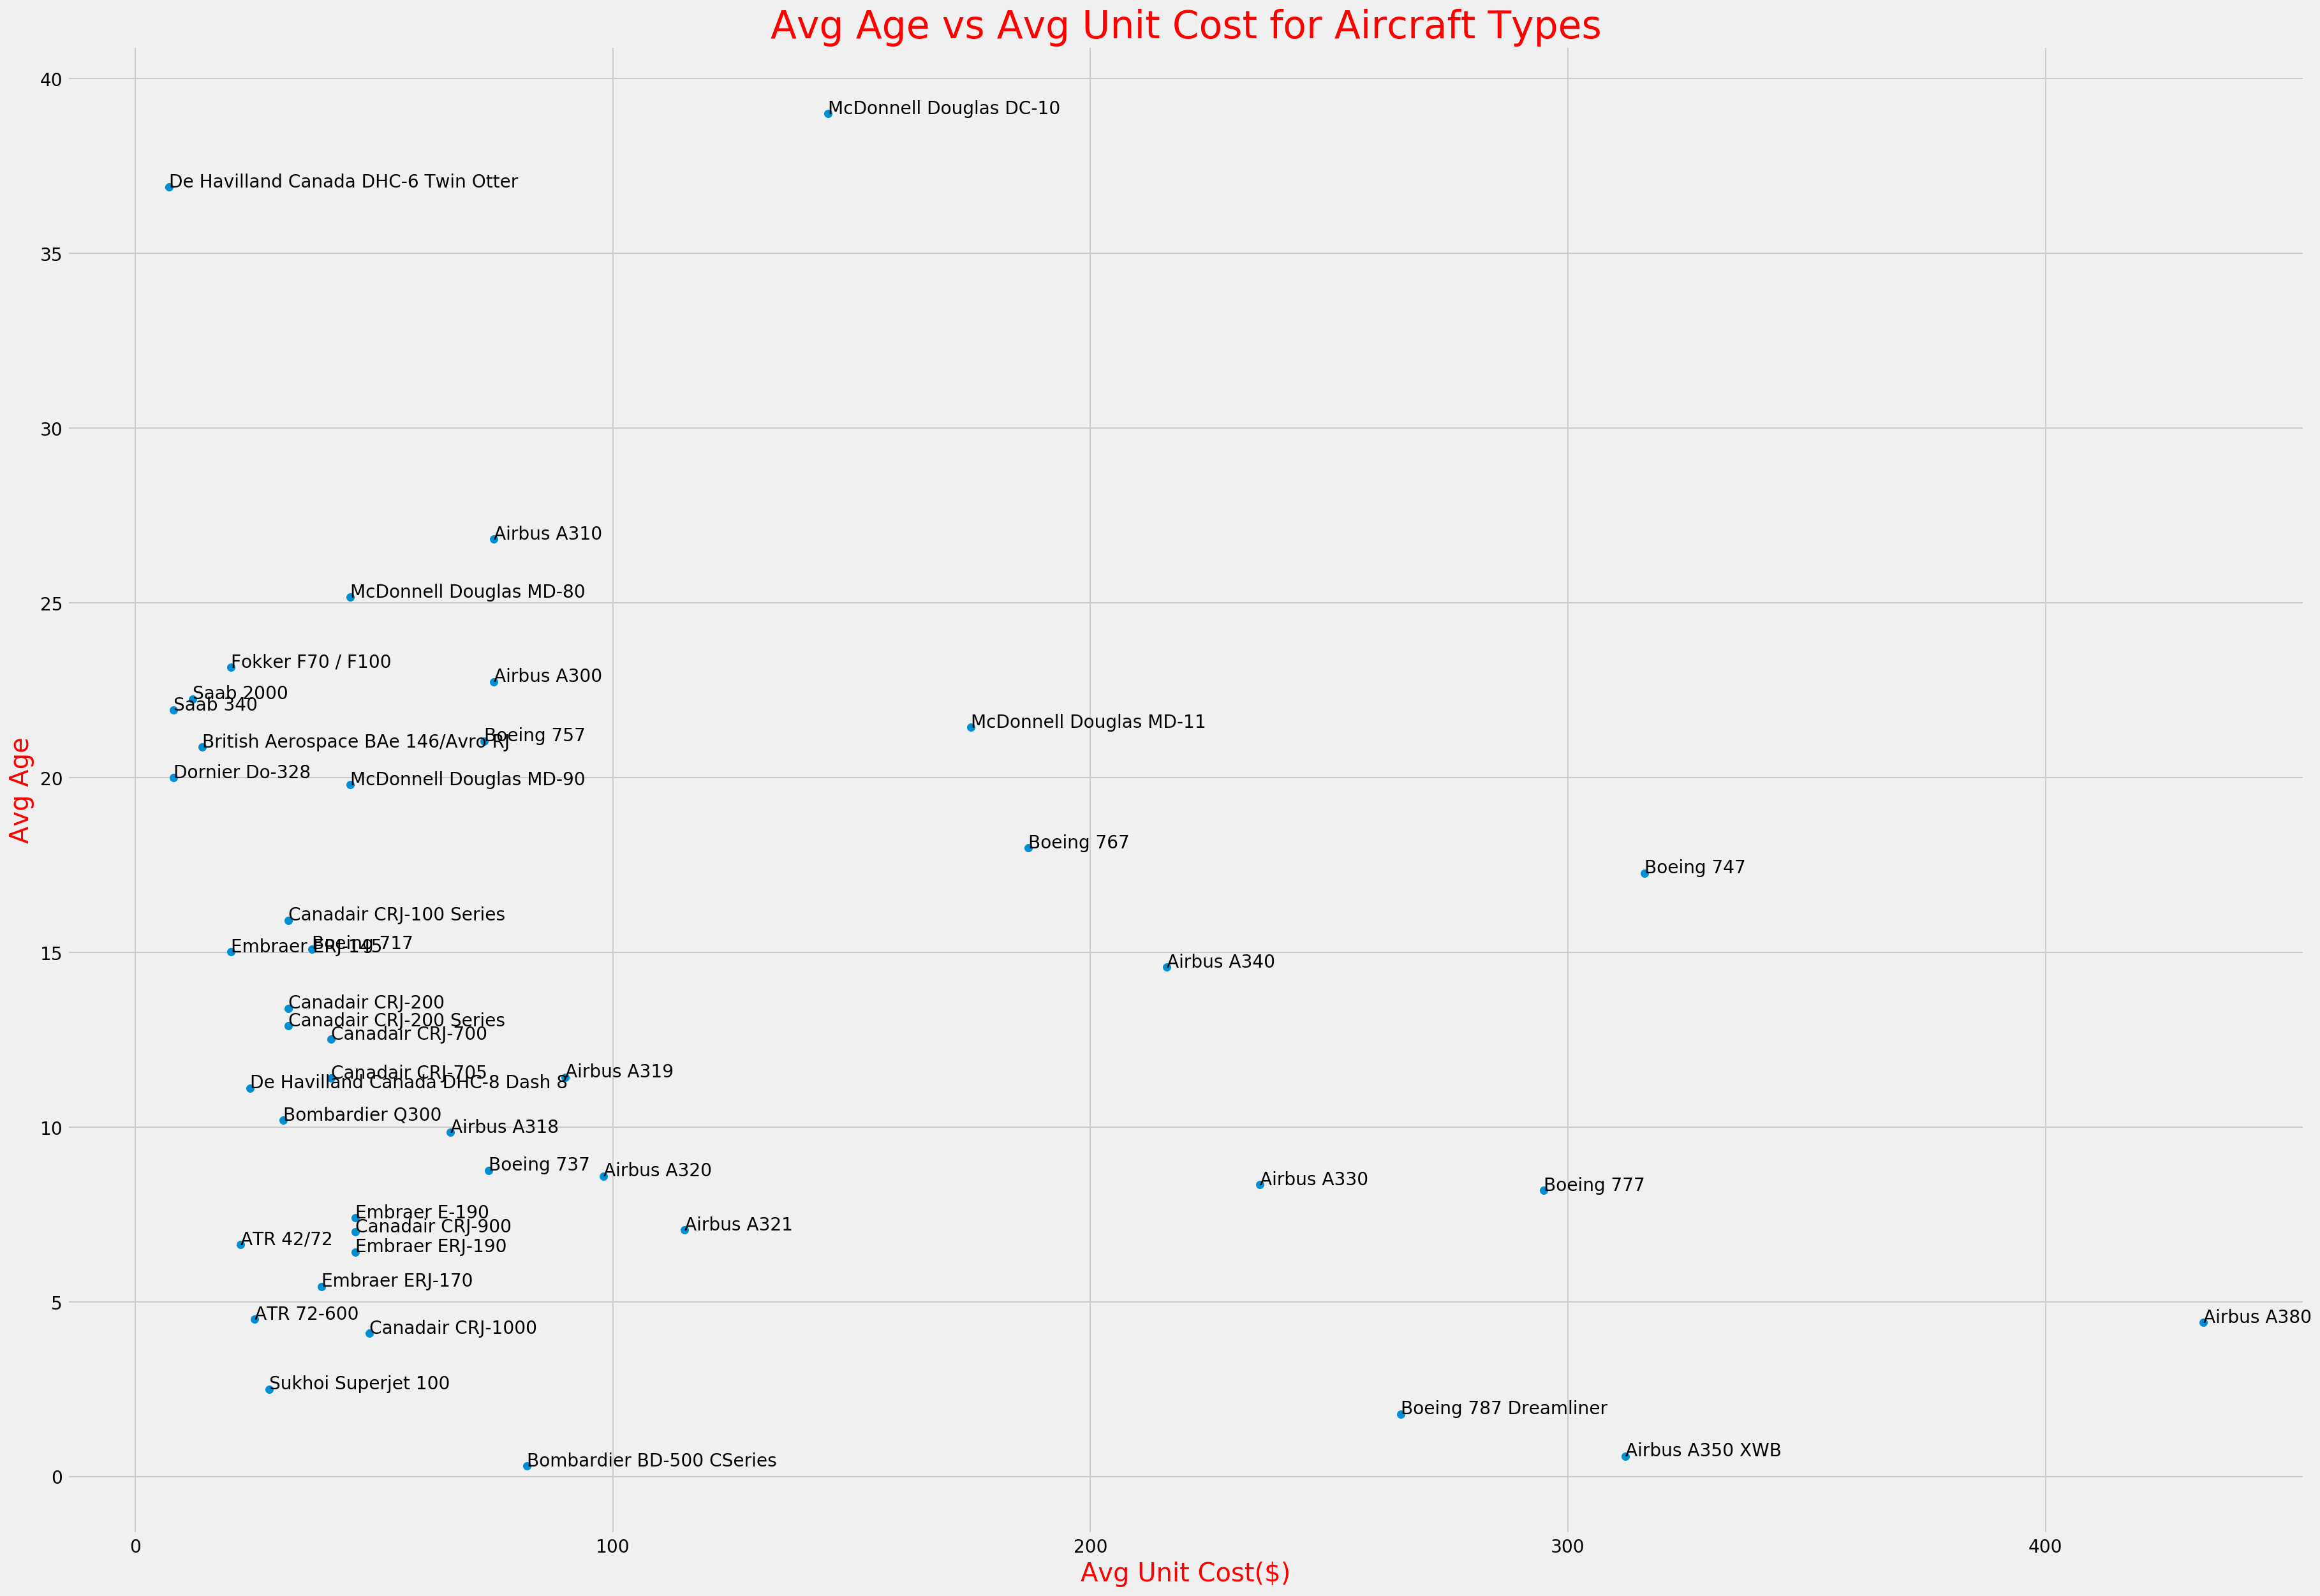

In [352]:
y = df.groupby('aircraft_type').mean()['average_age'].values
x = df.groupby('aircraft_type').mean()['unit_cost'].values
n = df.groupby('aircraft_type').mean()['average_age']

fig, ax = plt.subplots(figsize=(28,20))
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(n.index[i], (x[i], y[i]))
    
plt.title('Avg Age vs Avg Unit Cost for Aircraft Types', fontsize=30, color='r')
plt.ylabel('Avg Age', fontsize=20, color='r')
plt.xlabel('Avg Unit Cost(\$)', fontsize=20, color='r');

In terms of the most dominant brand, it seems that Airbus and Boeing aircraft types take up most of the market and are the most expensive. 
Even majority of the new orders for airplanes are of Airbus or Boeing brands, in some cases becoming the fastest growing new aircraft types in the market currently. 

However, there are many other Parent Airlines that do not use Airbus or Boeing aircrafts. I suppose it really depends on their cost operation/efficiency strategy. Airlines that prefer to go a cheaper route, may choose aircraft types such as Antonov or Cessna. Something I'd like to point out is that Boeing 727 is among the cheapest aircraft types out in the market. Indicating that a major brand like Boeing is trying to become more appealing to the lower masses. 
Other major airlines may exclusively shop for Boeing or Airbus aircrafts. It really boils down to the economic reasons at the end of the day.